## General Original DAtaset aggregated metrics

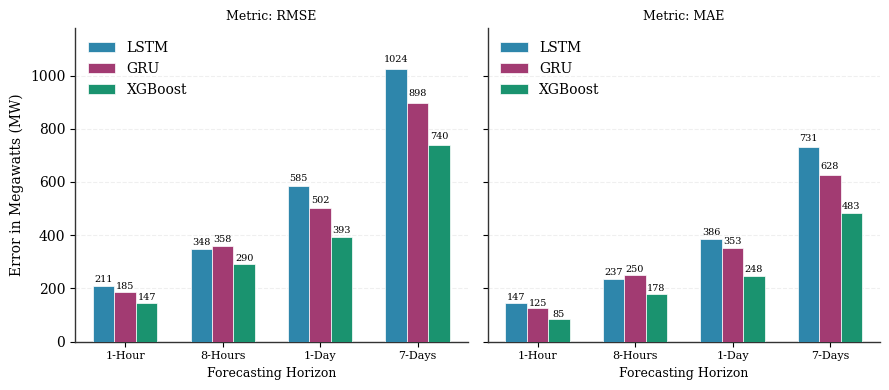

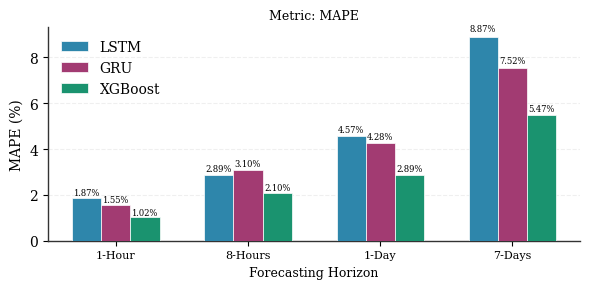

In [37]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1


horizons = ['1-Hour', '8-Hours', '1-Day', '7-Days']
models = ['LSTM', 'GRU', 'XGBoost']


colors = ['#2E86AB', '#A23B72', '#1A936F']  # With this code i recreate my colos: Blue, Burgundy, Green


mape_data = np.array([
    [1.87, 2.89, 4.57, 8.87],   # MAPE Data for LSTM
    [1.55, 3.10, 4.28, 7.52],   # MAPE Data for GRU
    [1.02, 2.10, 2.89, 5.47]    # MAPE Data for XGBoost
])

mae_data = np.array([
    [146.56, 237.06, 385.84, 731.22],  # MAE Data for LSTM
    [124.99, 249.57, 352.63, 627.72],  # MAE Data for GRU
    [84.60, 178.13, 247.70, 482.58]    # MAE Data for XGBoost
])

rmse_data = np.array([
    [211.12, 347.74, 585.28, 1023.68],  # RMSE Data for LSTM
    [185.26, 358.33, 501.74, 898.32],   # RMSE Data for GRU
    [147.00, 290.44, 393.23, 739.70]    # RMSE Daya for XGBoost
])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
x = np.arange(len(horizons))
width = 0.22
ymax = max(rmse_data.max(), mae_data.max()) * 1.15

# With this subsection i create the RMSE plot
for i in range(3):
    bars = ax1.bar(x + (i-1)*width, rmse_data[i], width,
                   label=models[i], color=colors[i],
                   edgecolor='white', linewidth=0.5, zorder=3)
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height * 1.02,
                 f'{height:.0f}', ha='center', va='bottom', fontsize=7)

ax1.set_xlabel('Forecasting Horizon', fontsize=9)
ax1.set_ylabel('Error in Megawatts (MW)', fontsize=10)
ax1.set_title('Metric: RMSE', fontsize=9)
ax1.set_xticks(x)
ax1.set_xticklabels(horizons, fontsize=8)
ax1.set_ylim(0, ymax)
ax1.legend(frameon=False, loc='upper left')
ax1.grid(axis='y', alpha=0.2, linestyle='--', zorder=0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# With this subsection i create the MAE plot
for i in range(3):
    bars = ax2.bar(x + (i-1)*width, mae_data[i], width,
                   label=models[i], color=colors[i],
                   edgecolor='white', linewidth=0.5, zorder=3)
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height * 1.02,
                 f'{height:.0f}', ha='center', va='bottom', fontsize=7)

ax2.set_xlabel('Forecasting Horizon', fontsize=9)
ax2.set_title('Metric: MAE', fontsize=9)
ax2.set_xticks(x)
ax2.set_xticklabels(horizons, fontsize=8)
ax2.set_ylim(0, ymax)
ax2.legend(frameon=False, loc='upper left')
ax2.grid(axis='y', alpha=0.2, linestyle='--', zorder=0)
ax2.yaxis.set_ticks_position('left')
ax2.grid(axis='y', alpha=0.2, linestyle='--', zorder=0)
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

fig.align_ylabels([ax1, ax2])
plt.tight_layout()
plt.savefig("General_rmse_mae_comparison_Original_Dataset.pdf", bbox_inches='tight')
plt.show()

# With this subsection i create the MAPE plot
plt.figure(figsize=(6, 3))
for i in range(3):
    bars = plt.bar(x + (i-1)*width, mape_data[i], width,
                   label=models[i], color=colors[i],
                   edgecolor='white', linewidth=0.5, zorder=3)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height * 1.02,
                 f'{height:.2f}%', ha='center', va='bottom', fontsize=6)

plt.xlabel('Forecasting Horizon', fontsize=9)
plt.ylabel('MAPE (%)', fontsize=10)
plt.title('Metric: MAPE', fontsize=9)
plt.xticks(x, horizons, fontsize=8)
plt.legend(frameon=False, loc='upper left')
plt.grid(axis='y', alpha=0.2, linestyle='--', zorder=0)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("General_mape_comparison_Original_Dataset.pdf", bbox_inches='tight')
plt.show()


## Regional 1 hour ahead MEtrics Original Dataset

## Regional Horizon 1 hour ahead

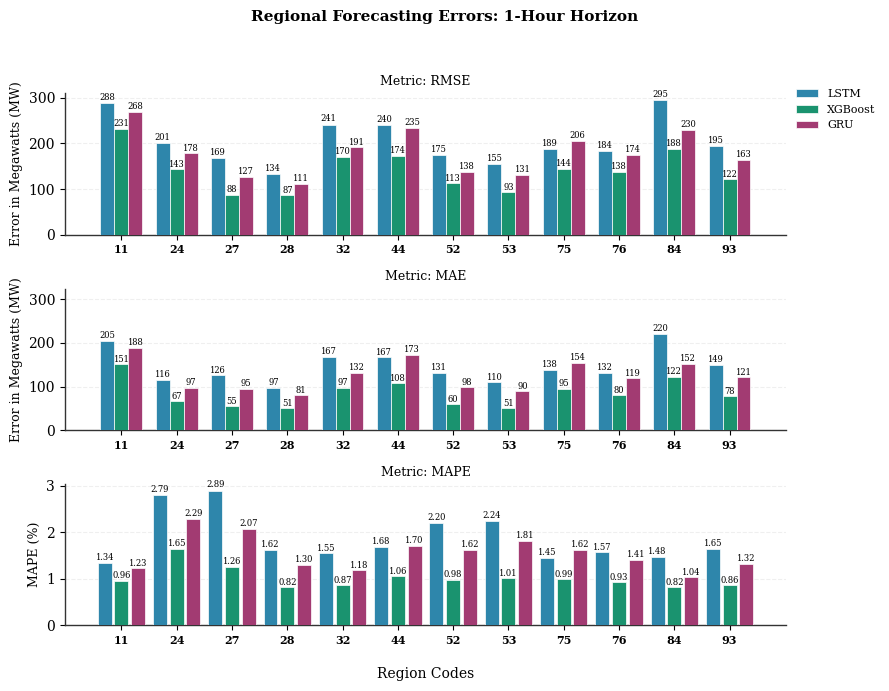

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1

regions = ['11','24','27','28','32','44','52','53','75','76','84','93']
x = np.arange(len(regions)) * 2.1  

models = ['LSTM', 'XGBoost', 'GRU']
colors = ['#2E86AB', '#1A936F', '#A23B72']
width = 0.53  # bar width

# 1-hour horizon data manually added
# All Data for LSTM  on the 1 hour horizon
lstm_rmse = [288.10, 201.28, 168.58, 133.80, 241.32, 240.29, 175.29, 154.92, 188.61, 183.76, 295.11, 194.70]
lstm_mae  = [204.90, 116.06, 125.78, 96.95, 167.44, 167.19, 131.03, 110.14, 137.86, 132.12, 219.99, 149.26]
lstm_mape = [1.34, 2.79, 2.89, 1.62, 1.55, 1.68, 2.20, 2.24, 1.45, 1.57, 1.48, 1.65]

# All Data for XGBoost  on the 1 hour horizon
xgb_rmse = [231.05, 143.04, 87.76, 86.74, 169.77, 173.54, 112.69, 92.77, 144.14, 138.40, 187.80, 121.70]
xgb_mae  = [151.23, 66.64, 55.30, 50.88, 97.05, 107.81, 59.65, 51.02, 95.27, 79.75, 122.30, 78.31]
xgb_mape = [0.96, 1.65, 1.26, 0.82, 0.87, 1.06, 0.98, 1.01, 0.99, 0.93, 0.82, 0.86]

# All Data for GRU  on the 1 hour horizon
gru_rmse = [267.87, 178.24, 126.89, 111.11, 191.12, 234.73, 137.78, 131.17, 205.77, 174.10, 229.74, 163.24]
gru_mae  = [187.98, 96.89, 94.93, 80.56, 131.91, 173.15, 97.96, 89.89, 154.34, 118.87, 152.28, 121.08]
gru_mape = [1.23, 2.29, 2.07, 1.30, 1.18, 1.70, 1.62, 1.81, 1.62, 1.41, 1.04, 1.32]

metric_data = {
    'Metric: RMSE': [lstm_rmse, xgb_rmse, gru_rmse],
    'Metric: MAE':  [lstm_mae,  xgb_mae,  gru_mae],
    'Metric: MAPE': [lstm_mape, xgb_mape, gru_mape]
}

fig, axes = plt.subplots(3, 1, figsize=(9, 7), sharex=True)
for ax, (metric, values) in zip(axes, metric_data.items()):
    group_spacing = 1.0 if metric != 'Metric: MAPE' else 1.2
    
    for i, model in enumerate(models):
        bars = ax.bar(x - width*group_spacing + i*width*group_spacing,
                      values[i], width,
                      label=model, color=colors[i],
                      edgecolor='white', linewidth=0.5, zorder=3)
        
        # Adding the values on top of the bars
        for bar in bars:
            height = bar.get_height()
            if metric == 'Metric: MAPE':
                ax.text(bar.get_x() + bar.get_width()/2, height*1.01,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=6)
            else:
                ax.text(bar.get_x() + bar.get_width()/2, height*1.01,
                        f'{height:.0f}', ha='center', va='bottom', fontsize=6)

    # creating the y-axis labels
    if metric == 'Metric: RMSE':
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
    elif metric == 'Metric: MAE':
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
        ax.set_ylim(0, max(lstm_rmse + xgb_rmse + gru_rmse)*1.1)
    else:
        ax.set_ylabel('MAPE (%)', fontsize=9)
        
    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=8, fontweight='bold')
    ax.tick_params(axis='x', labelbottom=True)
    ax.grid(axis='y', alpha=0.2, linestyle='--', zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(metric, fontsize=9)

axes[0].legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1.1), fontsize=8)
axes[-1].set_xlabel('Region Codes', fontsize=10, labelpad=15)

fig.suptitle('Regional Forecasting Errors: 1-Hour Horizon', fontsize=11, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("Regional_Forecasting_Comparison_1Hour.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Regional Horizon 8 hour ahead

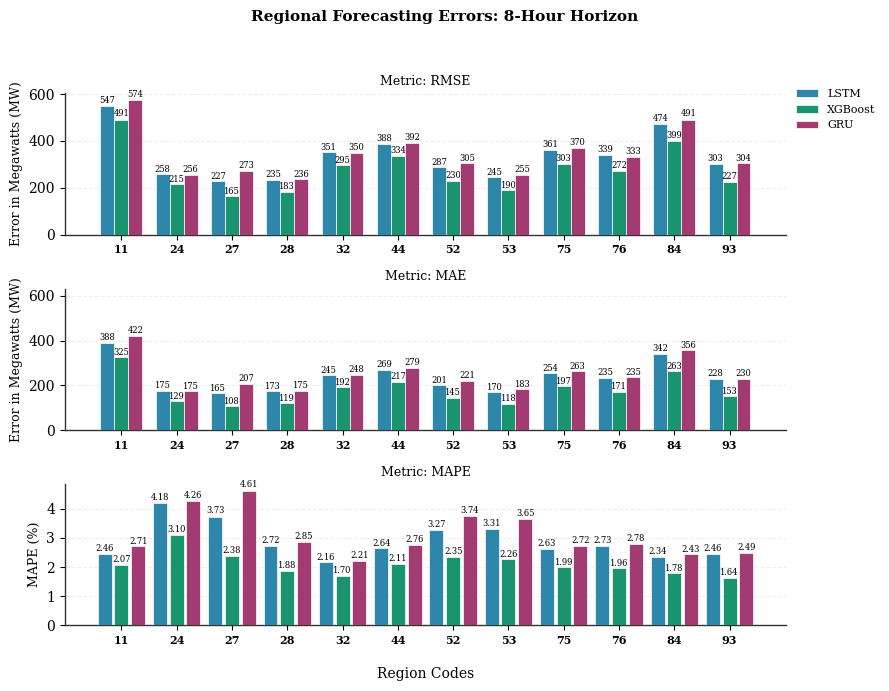

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1

regions = ['11','24','27','28','32','44','52','53','75','76','84','93']
x = np.arange(len(regions)) * 2.1  

models = ['LSTM', 'XGBoost', 'GRU']
colors = ['#2E86AB', '#1A936F', '#A23B72']
width = 0.53  # bar width

# 8-hour horizon data manually added
# All Data for LSTM  on the 8 hour horizon
lstm_rmse = [547.38, 258.34, 227.32, 235.03, 350.76, 388.27, 287.06, 244.63, 360.79, 339.42, 473.66, 303.39]
lstm_mae  = [388.34, 175.32, 164.80, 172.94, 245.14, 268.63, 200.59, 169.84, 254.39, 234.52, 342.09, 228.15]
lstm_mape = [2.46, 4.18, 3.73, 2.72, 2.16, 2.64, 3.27, 3.31, 2.63, 2.73, 2.34, 2.46]

# All Data for XGBoost  on the 8 hour horizon
xgb_rmse = [491.28, 215.38, 164.68, 182.57, 295.47, 334.43, 230.29, 190.14, 302.79, 271.60, 398.74, 226.57]
xgb_mae  = [325.17, 128.64, 107.78, 119.21, 192.49, 216.63, 145.45, 118.02, 196.95, 171.41, 263.28, 152.56]
xgb_mape = [2.07, 3.10, 2.38, 1.88, 1.70, 2.11, 2.35, 2.26, 1.99, 1.96, 1.78, 1.64]

# All Data for GRU  on the 8 hour horizon
gru_rmse = [574.26, 255.54, 273.28, 236.35, 349.72, 392.02, 304.55, 255.30, 369.53, 333.12, 491.03, 304.38]
gru_mae  = [421.78, 174.58, 206.52, 175.22, 248.22, 279.19, 221.10, 183.45, 263.17, 235.47, 355.98, 230.20]
gru_mape = [2.71, 4.26, 4.61, 2.85, 2.21, 2.76, 3.74, 3.65, 2.72, 2.78, 2.43, 2.49]

metric_data = {
    'Metric: RMSE': [lstm_rmse, xgb_rmse, gru_rmse],
    'Metric: MAE':  [lstm_mae,  xgb_mae,  gru_mae],
    'Metric: MAPE': [lstm_mape, xgb_mape, gru_mape]
}

fig, axes = plt.subplots(3, 1, figsize=(9, 7), sharex=True)

for ax, (metric, values) in zip(axes, metric_data.items()):
    group_spacing = 1.0 if metric != 'Metric: MAPE' else 1.2
    
    for i, model in enumerate(models):
        bars = ax.bar(x - width*group_spacing + i*width*group_spacing,
                      values[i], width,
                      label=model, color=colors[i],
                      edgecolor='white', linewidth=0.5, zorder=3)
        
        # Adding the values on top of the bars
        for bar in bars:
            height = bar.get_height()
            if metric == 'Metric: MAPE':
                ax.text(bar.get_x() + bar.get_width()/2, height*1.01,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=6)
            else:
                ax.text(bar.get_x() + bar.get_width()/2, height*1.01,
                        f'{height:.0f}', ha='center', va='bottom', fontsize=6)

    # Creating the y-axis labels
    if metric == 'Metric: RMSE':
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
    elif metric == 'Metric: MAE':
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
        ax.set_ylim(0, max(lstm_rmse + xgb_rmse + gru_rmse)*1.1)
    else:
        ax.set_ylabel('MAPE (%)', fontsize=9)
        
    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=8, fontweight='bold')
    ax.tick_params(axis='x', labelbottom=True)
    ax.grid(axis='y', alpha=0.2, linestyle='--', zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(metric, fontsize=9)

axes[0].legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1.1), fontsize=8)
axes[-1].set_xlabel('Region Codes', fontsize=10, labelpad=15)

fig.suptitle('Regional Forecasting Errors: 8-Hour Horizon', fontsize=11, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("Regional_Forecasting_8Hour.pdf", format='pdf', bbox_inches='tight')
plt.show()


## regional Horizon 24 hours ahead

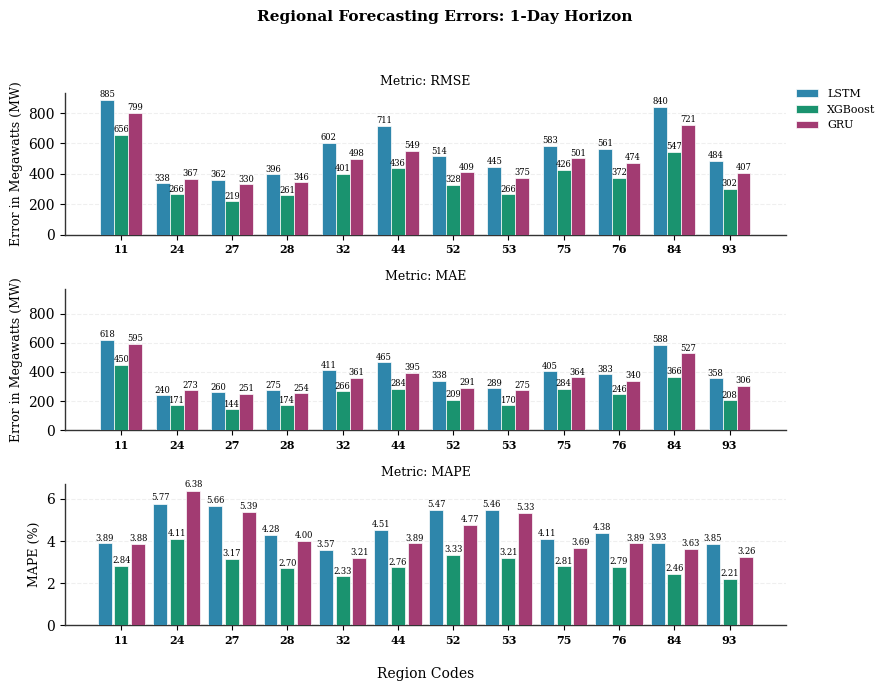

In [75]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1


regions = ['11','24','27','28','32','44','52','53','75','76','84','93']
x = np.arange(len(regions)) * 2.1  


models = ['LSTM', 'XGBoost', 'GRU']
colors = ['#2E86AB', '#1A936F', '#A23B72']
width = 0.53  # set the bar with

# 1-day horizon data manually added
# All Data for LSTM  on the 1-day horizon
lstm_rmse = [885.09,337.92,362.35,395.82,601.56,711.48,514.29,444.60,582.69,561.33,840.05,484.22]
lstm_mae  = [618.15,239.92,259.77,274.52,411.46,465.38,338.14,288.98,405.06,382.75,588.19,357.74]
lstm_mape = [3.89,5.77,5.66,4.28,3.57,4.51,5.47,5.46,4.11,4.38,3.93,3.85]

# All Data for XGBoost on the 1-day  horizon
xgb_rmse = [655.63,265.65,219.18,260.57,400.95,436.33,327.92,265.78,425.61,372.35,546.76,301.90]
xgb_mae  = [449.85,171.46,144.10,173.79,265.89,283.80,208.99,170.14,284.01,246.20,365.87,208.24]
xgb_mape = [2.84,4.11,3.17,2.70,2.33,2.76,3.33,3.21,2.81,2.79,2.46,2.21]

# All Data for GRU on the 1-day horizon
gru_rmse = [798.69,367.40,330.19,346.10,497.66,549.21,409.39,374.87,501.41,473.92,720.99,407.43]
gru_mae  = [594.84,272.52,250.74,253.89,361.37,394.66,291.29,275.31,363.75,339.66,527.39,306.09]
gru_mape = [3.88,6.38,5.39,4.00,3.21,3.89,4.77,5.33,3.69,3.89,3.63,3.26]

metric_data = {
    'Metric: RMSE': [lstm_rmse, xgb_rmse, gru_rmse],
    'Metric: MAE':  [lstm_mae,  xgb_mae,  gru_mae],
    'Metric: MAPE': [lstm_mape, xgb_mape, gru_mape]
}


fig, axes = plt.subplots(3, 1, figsize=(9, 7), sharex=True)

for ax, (metric, values) in zip(axes, metric_data.items()):
    group_spacing = 1.0 if metric != 'Metric: MAPE' else 1.2
    
    for i, model in enumerate(models):
        bars = ax.bar(x - width*group_spacing + i*width*group_spacing,
                      values[i], width,
                      label=model, color=colors[i],
                      edgecolor='white', linewidth=0.5, zorder=3)
        
        # adding the values on top of the bars
        for bar in bars:
            height = bar.get_height()
            if metric == 'Metric: MAPE':
                ax.text(bar.get_x() + bar.get_width()/2, height*1.01,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=6)
            else:
                ax.text(bar.get_x() + bar.get_width()/2, height*1.01,
                        f'{height:.0f}', ha='center', va='bottom', fontsize=6)

    # creating the y-axis labels
    if metric == 'Metric: RMSE':
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
    elif metric == 'Metric: MAE':
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
        ax.set_ylim(0, max(lstm_rmse + xgb_rmse + gru_rmse)*1.1)
    else:
        ax.set_ylabel('MAPE (%)', fontsize=9)
        
    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=8, fontweight='bold')
    ax.tick_params(axis='x', labelbottom=True)
    ax.grid(axis='y', alpha=0.2, linestyle='--', zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(metric, fontsize=9)


axes[0].legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1.1), fontsize=8)


axes[-1].set_xlabel('Region Codes', fontsize=10,  labelpad=15)


fig.suptitle('Regional Forecasting Errors: 1-Day Horizon', fontsize=11, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("Regional_Forecasting_Comparison_24Hour.pdf", format='pdf', bbox_inches='tight')
plt.show()


## regional 7 day ahead horizon

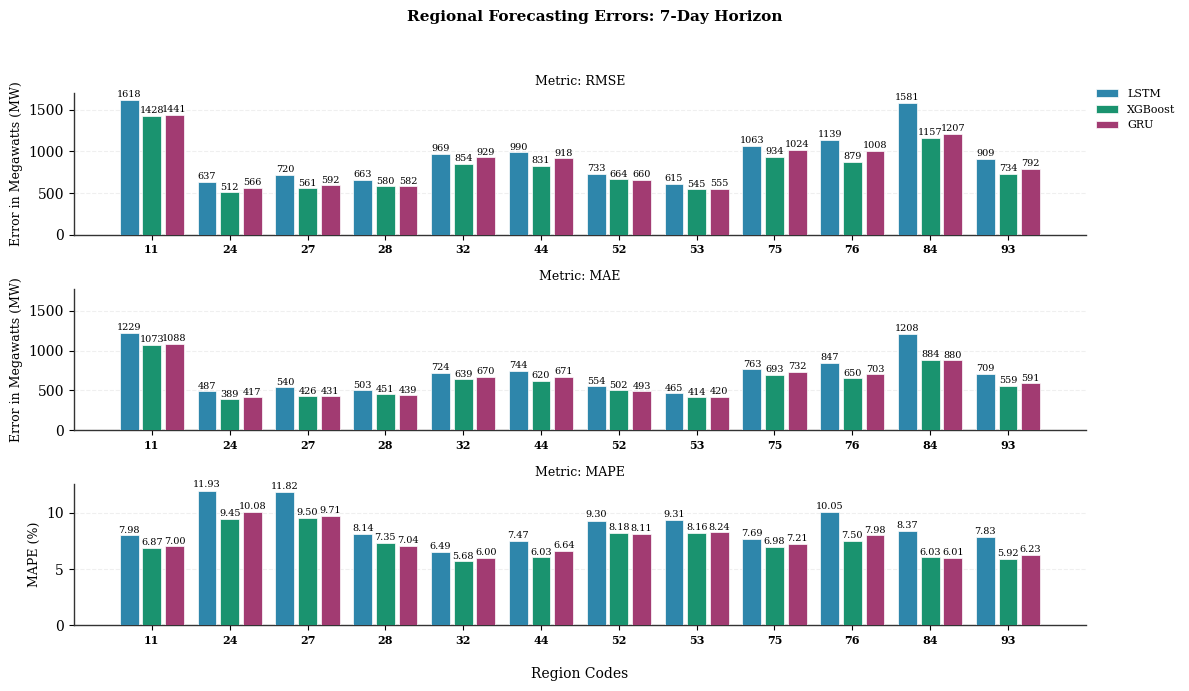

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1

regions = ['11','24','27','28','32','44','52','53','75','76','84','93']
x = np.arange(len(regions)) * 3.3  # slightly more space between groups

models = ['LSTM', 'XGBoost', 'GRU']
colors = ['#2E86AB', '#1A936F', '#A23B72']
width = 0.8  # wider bars


# 7-day horizon data manually added
# All Data for LSTM  on the 7-day horizon
lstm_rmse = [1618.44, 637.43, 719.81, 662.75, 969.20, 989.88, 732.96, 614.56, 1062.97, 1139.42, 1581.19, 909.43]
lstm_mae  = [1228.61, 486.51, 540.33, 503.41, 724.02, 743.99, 554.02, 465.49, 763.47, 847.15, 1208.48, 709.14]
lstm_mape = [7.98, 11.93, 11.82, 8.14, 6.49, 7.47, 9.30, 9.31, 7.69, 10.05, 8.37, 7.83]

# All Data for XGBoost on the 7-day horizon
xgb_rmse = [1428.47, 511.62, 561.26, 579.76, 853.69, 831.42, 664.44, 544.72, 933.99, 879.08, 1157.12, 734.03]
xgb_mae  = [1072.79, 389.36, 425.65, 450.75, 639.30, 619.81, 501.96, 414.21, 693.03, 649.63, 884.08, 559.32]
xgb_mape = [6.87, 9.45, 9.50, 7.35, 5.68, 6.03, 8.18, 8.16, 6.98, 7.50, 6.03, 5.92]

# All Data for XGBoost on the 7-day horizon
gru_rmse = [1441.24, 566.29, 591.80, 582.45, 928.59, 917.67, 660.40, 554.53, 1023.60, 1008.19, 1206.81, 792.31]
gru_mae  = [1088.43, 417.06, 430.58, 438.56, 669.64, 670.65, 493.26, 419.54, 731.71, 702.68, 879.92, 590.60]
gru_mape = [7.00, 10.08, 9.71, 7.04, 6.00, 6.64, 8.11, 8.24, 7.21, 7.98, 6.01, 6.23]

metric_data = {
    'Metric: RMSE': [lstm_rmse, xgb_rmse, gru_rmse],
    'Metric: MAE':  [lstm_mae,  xgb_mae,  gru_mae],
    'Metric: MAPE': [lstm_mape, xgb_mape, gru_mape]
}

fig, axes = plt.subplots(3, 1, figsize=(12, 7), sharex=True)

for ax, (metric, values) in zip(axes, metric_data.items()):
    group_spacing = 1.2 if metric != 'Metric: MAPE' else 1.2  
    
    for i, model in enumerate(models):
        bars = ax.bar(x - width*group_spacing + i*width*group_spacing,
                      values[i], width,
                      label=model, color=colors[i],
                      edgecolor='white', linewidth=0.5, zorder=3)
        
        # adding the values on top of the bars
        for bar in bars:
            height = bar.get_height()
            if metric == 'Metric: MAPE':
                ax.text(bar.get_x() + bar.get_width()/2, height*1.01,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=7)
            else:
                ax.text(bar.get_x() + bar.get_width()/2, height*1.01,
                        f'{height:.0f}', ha='center', va='bottom', fontsize=7)

    # creating the y-axis labels
    if metric == 'Metric: RMSE':
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
    elif metric == 'Metric: MAE':
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
        ax.set_ylim(0, max(lstm_rmse + xgb_rmse + gru_rmse)*1.1)
    else:
        ax.set_ylabel('MAPE (%)', fontsize=9)
        
    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=8, fontweight='bold')
    ax.tick_params(axis='x', labelbottom=True)
    ax.grid(axis='y', alpha=0.2, linestyle='--', zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(metric, fontsize=9)

axes[0].legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1.1), fontsize=8)
axes[-1].set_xlabel('Region Codes', fontsize=10, labelpad=15)

fig.suptitle('Regional Forecasting Errors: 7-Day Horizon', fontsize=11, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("Regional_Forecasting_Comparison_7Day.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Hourly FLattened Plot horizons

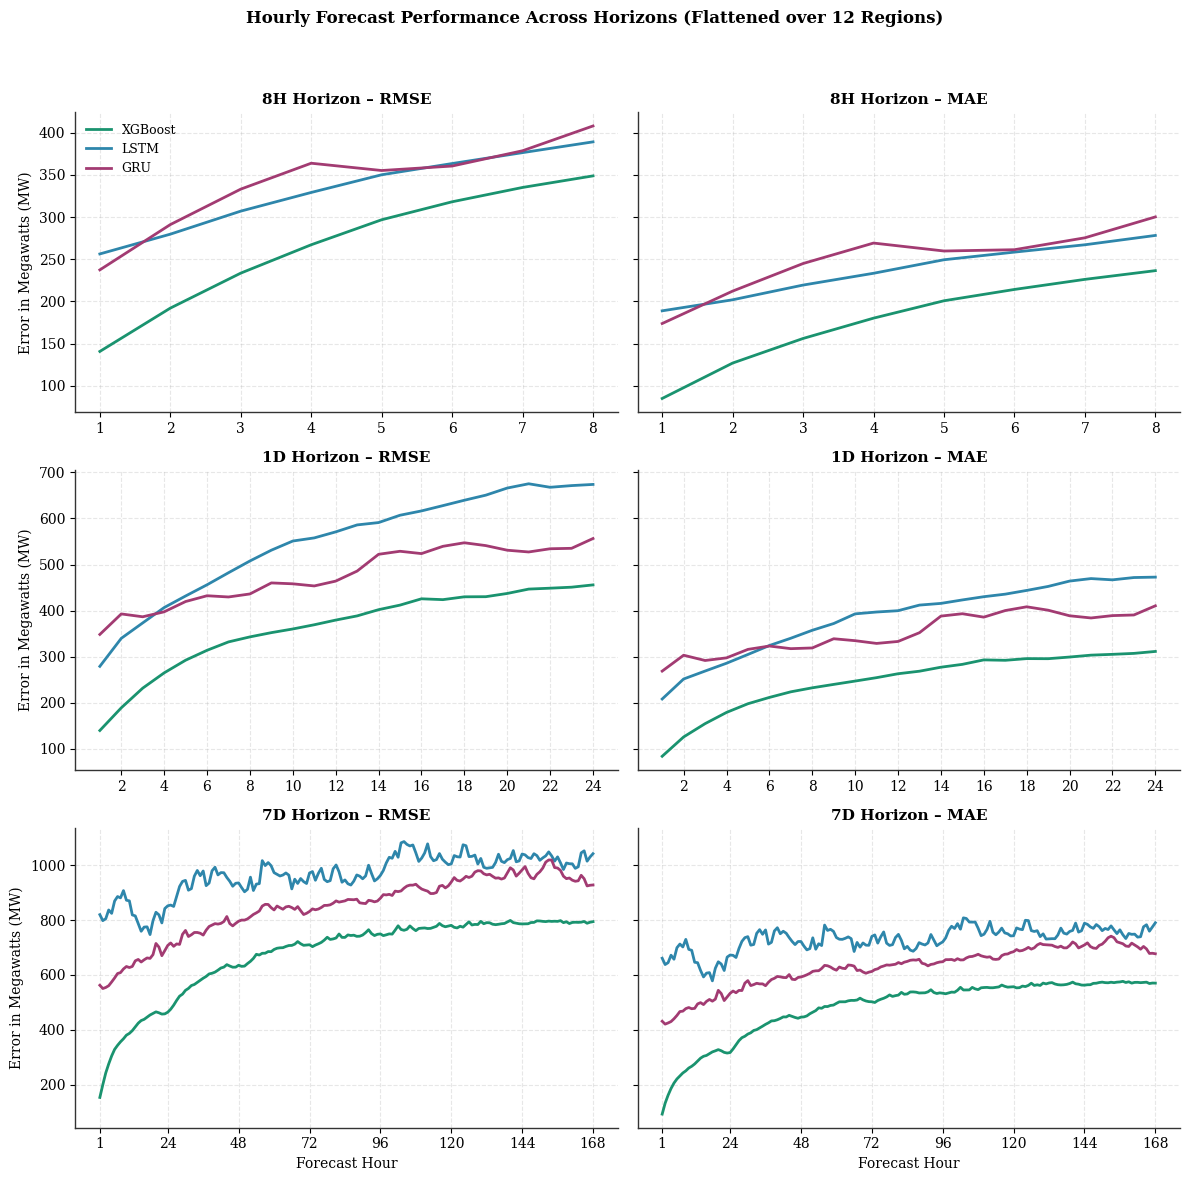

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading all the data needed in this plot
xgb_8h  = pd.read_csv('flattened_xgboost_8h_original.xls')
lstm_8h = pd.read_csv('v2flattened_lstm_8h_original.csv')
gru_8h  = pd.read_csv('v2flattened_gru_8h_original.csv')

xgb_24h  = pd.read_csv('flattened_xgboost_24h_original.xls')
lstm_24h = pd.read_csv('v2flattened_lstm_24h_original.csv')
gru_24h  = pd.read_csv('v2flattened_gru_24h_original.csv')

xgb_168h  = pd.read_csv('flattened_xgboost_168h_original.xls')
lstm_168h = pd.read_csv('v2flattened_lstm_168h_original.csv')
gru_168h  = pd.read_csv('v2flattened_gru_168h_original.csv')

# Creating a professional style for the plots
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1

# Setting the colors for the models on this way, because its more efficient
colors = {'LSTM':'#2E86AB', 'XGBoost':'#1A936F', 'GRU':'#A23B72'}

#Defining the horizons and setting the data up
horizons = ['8H', '1D', '7D']
xgb_data  = [xgb_8h, xgb_24h, xgb_168h]
lstm_data = [lstm_8h, lstm_24h, lstm_168h]
gru_data  = [gru_8h, gru_24h, gru_168h]

# Creating the figures with 3 rows and 2 columns to show all the plots
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False, sharey='row')

xticks_dict = {
    '8H':  [1, 2, 3, 4, 5, 6, 7, 8],
    '1D': [2, 4, 6,8,10,12, 14,16, 18,20,22,24],
    '7D':  [1, 24, 48, 72, 96, 120, 144, 168]
}

# Creating a for loop for plotting each horizon 
for i, horizon in enumerate(horizons):
    # Creating the RMSE plot on the left side
    ax = axes[i, 0]
    ax.plot(xgb_data[i]['horizon'], xgb_data[i]['RMSE'], label='XGBoost', color=colors['XGBoost'], linewidth=2)
    ax.plot(lstm_data[i]['horizon'], lstm_data[i]['RMSE'], label='LSTM', color=colors['LSTM'], linewidth=2)
    ax.plot(gru_data[i]['horizon'], gru_data[i]['RMSE'], label='GRU', color=colors['GRU'], linewidth=2)
    ax.set_title(f'{horizon} Horizon – RMSE', fontsize=11, fontweight='bold')
    ax.set_ylabel('Error in Megawatts (MW)', fontsize=10)
    ax.set_xticks(xticks_dict[horizon])  
    ax.grid(alpha=0.3, linestyle='--', zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
     # Creating the MAE plot on the left side
    ax = axes[i, 1]
    ax.plot(xgb_data[i]['horizon'], xgb_data[i]['MAE'], label='XGBoost', color=colors['XGBoost'], linewidth=2)
    ax.plot(lstm_data[i]['horizon'], lstm_data[i]['MAE'], label='LSTM', color=colors['LSTM'], linewidth=2)
    ax.plot(gru_data[i]['horizon'], gru_data[i]['MAE'], label='GRU', color=colors['GRU'], linewidth=2)
    ax.set_title(f'{horizon} Horizon – MAE', fontsize=11, fontweight='bold')
    ax.set_xticks(xticks_dict[horizon])
    ax.grid(alpha=0.3, linestyle='--', zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes[-1, :]:
    ax.set_xlabel('Forecast Hour', fontsize=10)
axes[0,0].legend(frameon=False, fontsize=9, loc='upper left')

fig.suptitle('Hourly Forecast Performance Across Horizons (Flattened over 12 Regions)', fontsize=12, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("Flattened_AllHorizons_RMSE_MAE_Original_Dataset.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Error Metrics

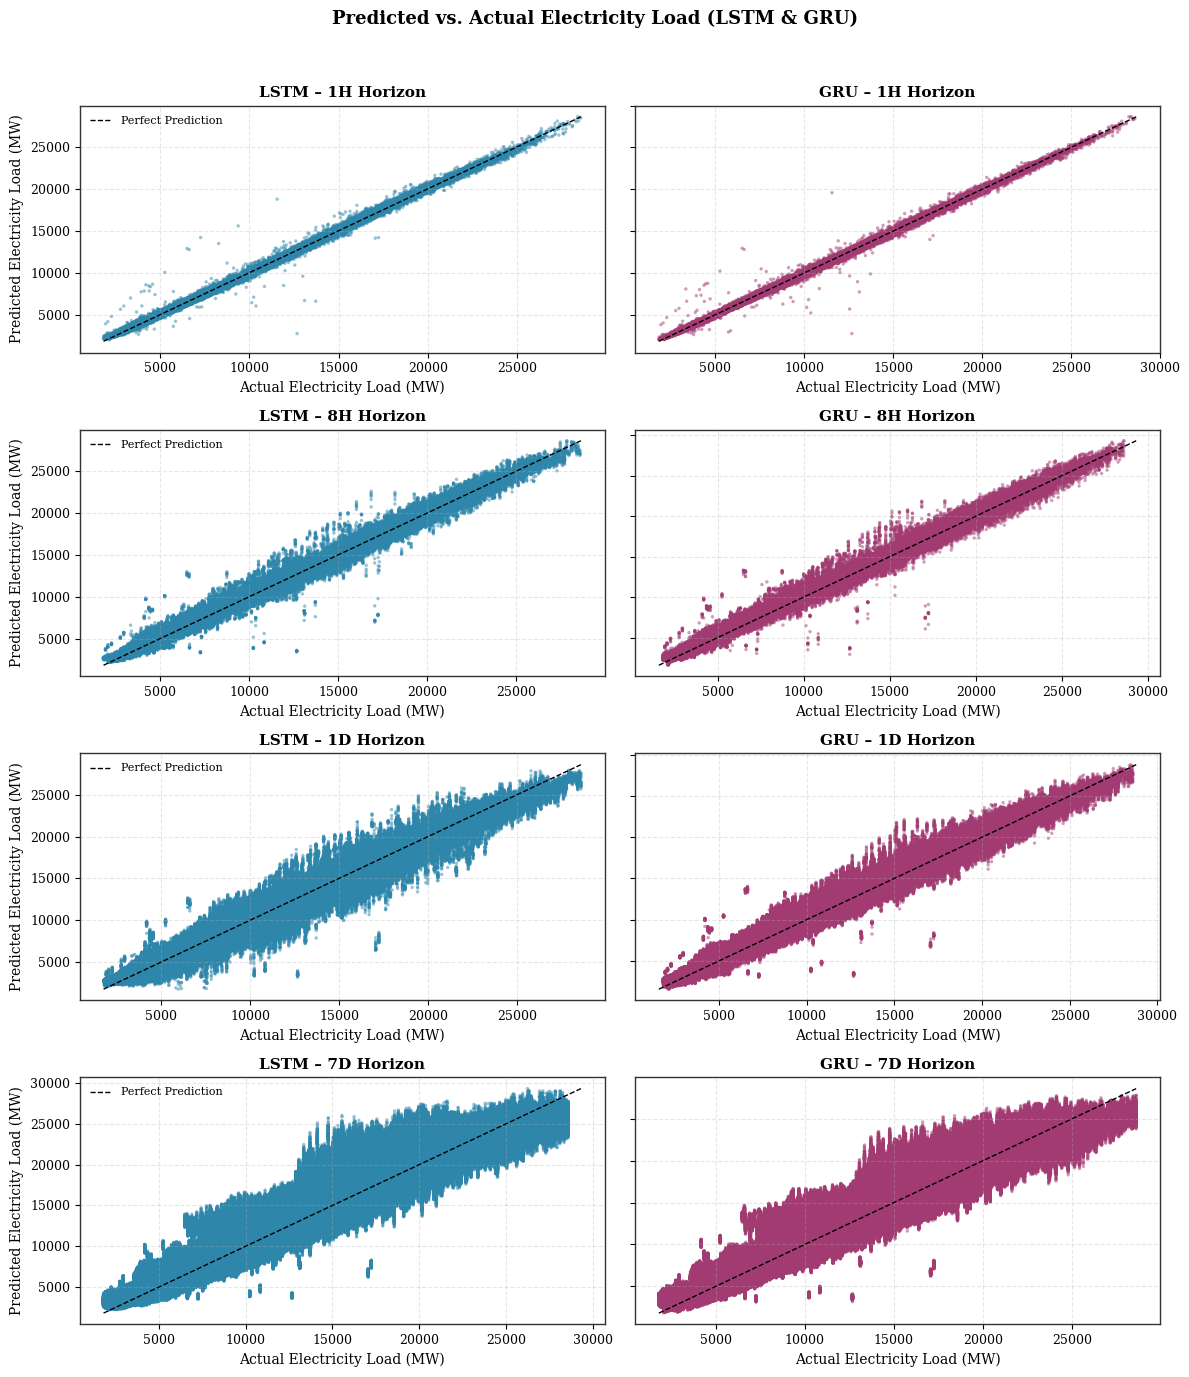

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting up all models and horizons
models = ['LSTM', 'GRU']
horizons = ['1H', '8H', '1D', '7D']

# Efficienter way for Loading the all the data  needed for plotting
data = {}
for model in models:
    for horizon in horizons:
        filename = f'v2GPU_Predictions_{model}_{horizon}_Original_Data.csv'
        data[f'{model}_{horizon}'] = pd.read_csv(filename)

# Creating a professional style plot
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1

# Setting up the colors for the models
colors = {
    'LSTM': '#2E86AB',   # Deep Blue 
    'GRU':  '#A23B72'    # Maganta
}

# Creating figures with 4 rows and 2 columns 
fig, axes = plt.subplots(4, 2, figsize=(12, 14), sharex=False, sharey=False)

for i, horizon in enumerate(horizons):
    for j, model in enumerate(models):
        df = data[f'{model}_{horizon}']
        ax = axes[i, j]

        # Creating the scatter plot
        ax.scatter(df['y_true'], df['y_pred'], alpha=0.5, s=6, color=colors[model],
                   edgecolor='none', linewidths=0, rasterized=True)

        # Creating the perfect prediction line
        min_val = min(df['y_true'].min(), df['y_pred'].min())
        max_val = max(df['y_true'].max(), df['y_pred'].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1, label='Perfect Prediction')

        ax.set_title(f"{model} – {horizon} Horizon", fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3, linestyle='--', zorder=0)
        ax.tick_params(axis='x', labelsize=9)
        ax.tick_params(axis='y', labelsize=9)

        # Creating the ylabels 
        if j == 0:
            ax.set_ylabel('Predicted Electricity Load (MW)', fontsize=10)
        else:
            ax.set_ylabel('')
            ax.set_yticklabels([])  
            ax.tick_params(axis='y', which='both', left=True, labelleft=False)


        ax.set_xlabel('Actual Electricity Load (MW)', fontsize=10)
        if j == 0:
            ax.legend(frameon=False, fontsize=8, loc='upper left')


fig.suptitle("Predicted vs. Actual Electricity Load (LSTM & GRU)",
             fontsize=13, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("ErrorAnalysis_LSTM_GRU_AllHorizons_without_exogenous.pdf", format='pdf', bbox_inches='tight')
plt.show()


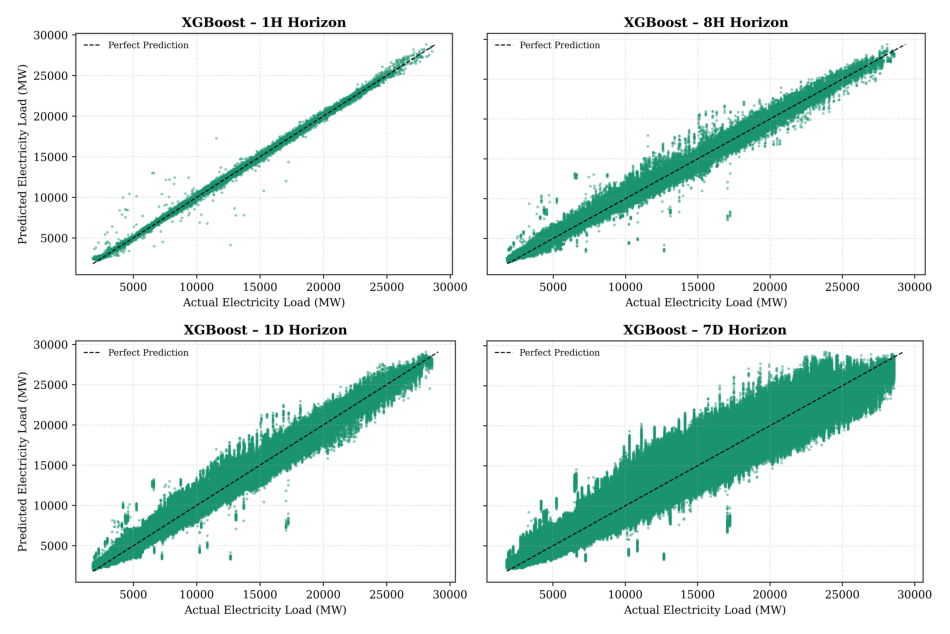

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

#  Loading in all the four images
img1 = Image.open("XGBoost_1H_Original_Data_Prediction.png")
img2 = Image.open("XGBoost_8H_Original_Data_Prediction.png")
img3 = Image.open("XGBoost_1D_Original_Data_Prediction.png")
img4 = Image.open("XGBoost_7D_Original_Data_Prediction.png")  

# Resize the files to make it less large for overleaf
resize_factor = 0.5

#Resizing the images but making sure to keep the same ratio
img1_resized = img1.resize((int(img1.width * resize_factor), int(img1.height * resize_factor)))
img2_resized = img2.resize((int(img2.width * resize_factor), int(img2.height * resize_factor)))
img3_resized = img3.resize((int(img3.width * resize_factor), int(img3.height * resize_factor)))
img4_resized = img4.resize((int(img4.width * resize_factor), int(img4.height * resize_factor)))


# Computing sizes for the merged grid plot
top_height = max(img1_resized.height, img2_resized.height)
bottom_height = max(img3_resized.height, img4_resized.height)
total_width = max(img1_resized.width + img2_resized.width, img3_resized.width + img4_resized.width)
total_height = top_height + bottom_height


# Creating a blank canvas for pasting the new images
merged_img = Image.new('RGB', (total_width, total_height), color=(255, 255, 255))
merged_img.paste(img1_resized, (0, 0))
merged_img.paste(img2_resized, (img1_resized.width, 0))
merged_img.paste(img3_resized, (0, top_height))
merged_img.paste(img4_resized, (img3_resized.width, top_height))


plt.figure(figsize=(12, total_height / 100))
plt.imshow(merged_img)
plt.axis('off')
plt.show()


merged_img.save("XGBoost_1H_8H_1D_7D_Merged_Grid.pdf", format='PDF')


## Density error

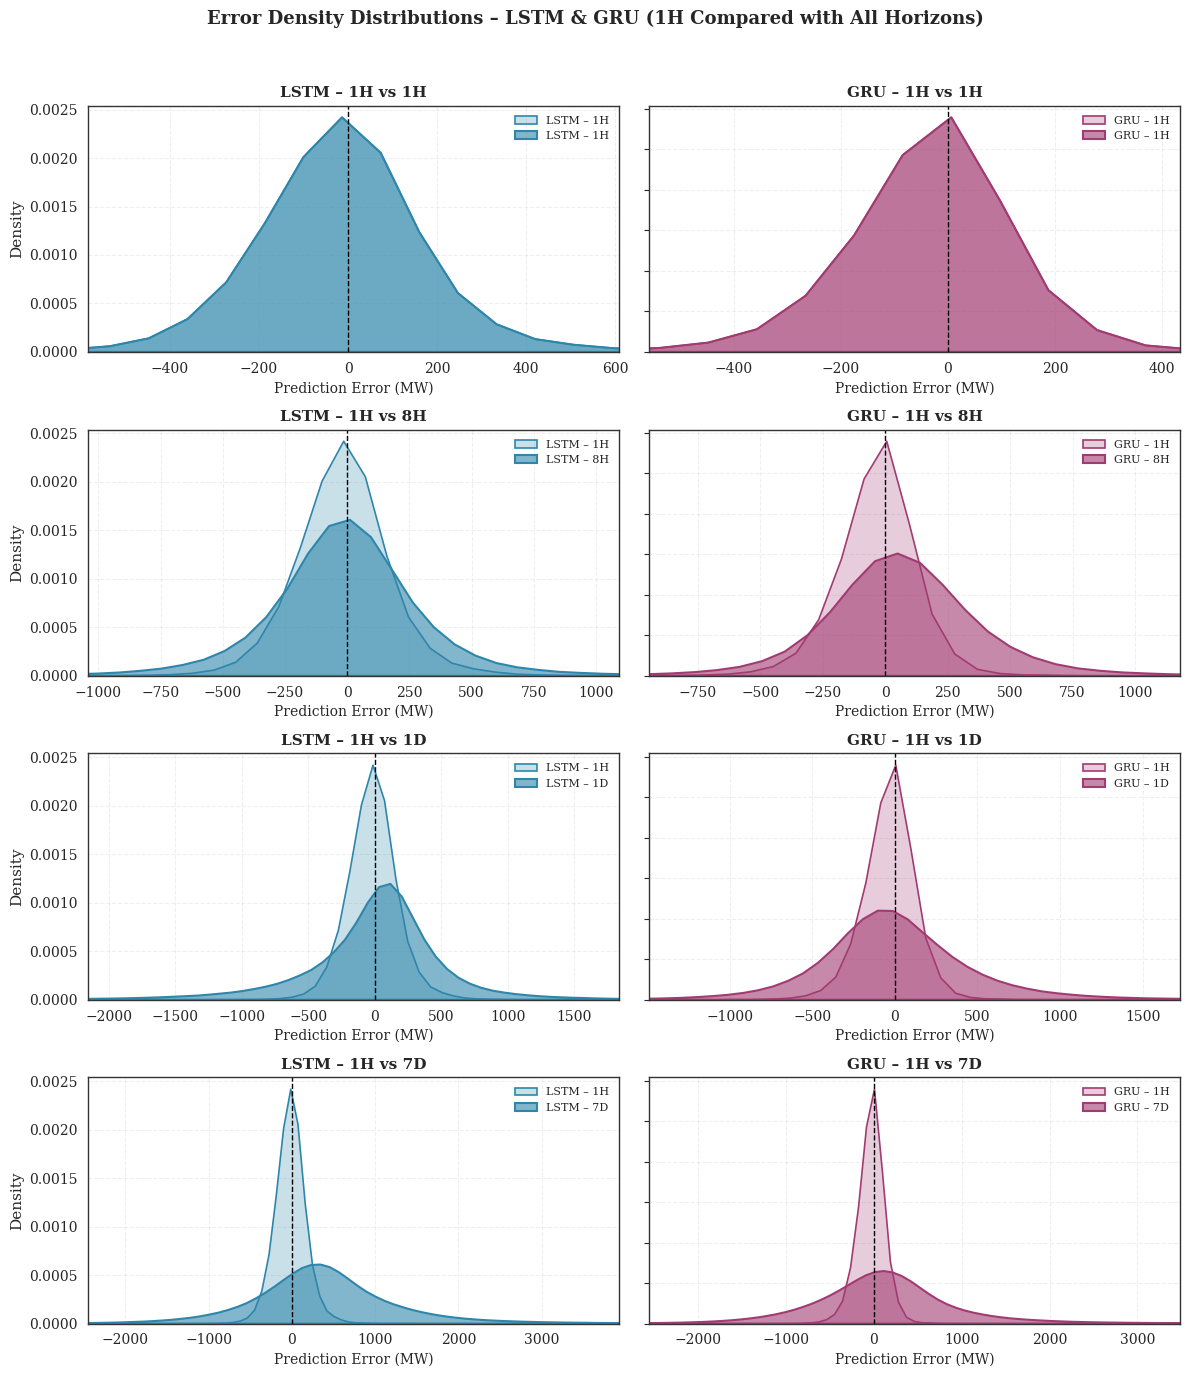

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setting up all models and horizons
models = ['LSTM', 'GRU']
horizons = ['1H', '8H', '1D', '7D']

#Loading the data efficienter for plotting
data = {}
for model in models:
    for horizon in horizons:
        filename = f'v2GPU_Predictions_{model}_{horizon}_Original_Data.csv'
        df = pd.read_csv(filename)
        df['error'] = df['y_pred'] - df['y_true']
        data[f'{model}_{horizon}'] = df

# Creating a professional stype plote
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1

# Setting the colors for the models
colors = {
    'LSTM': '#2E86AB',   # Deep blue
    'GRU':  '#A23B72'    # Magenta tone
}


fig, axes = plt.subplots(4, 2, figsize=(12, 14), sharex=False, sharey=False)

# Comparing the horizons between eacherother. Setting up each horizon against the 1 Hour horizon
pairs = [('1H', '1H'), ('1H', '8H'), ('1H', '1D'), ('1H', '7D')]

for i, (short_h, compare_h) in enumerate(pairs):
    for j, model in enumerate(models):
        ax = axes[i, j]
        df_short = data[f'{model}_{short_h}']
        df_compare = data[f'{model}_{compare_h}']
        combined_errors = pd.concat([df_short['error'], df_compare['error']])
        xmin, xmax = np.percentile(combined_errors, [1, 99]) 
        margin = (xmax - xmin) * 0.1

       #Creating the plots 
        sns.kdeplot(
            df_short['error'],
            fill=True, alpha=0.25, color=colors[model],
            linewidth=1.2, ax=ax, label=f'{model} – {short_h}'
        )
        sns.kdeplot(
            df_compare['error'],
            fill=True, alpha=0.6, color=colors[model],
            linewidth=1.5, ax=ax, label=f'{model} – {compare_h}'
        )


        ax.axvline(0, color='k', linestyle='--', linewidth=1)
        ax.set_xlim(xmin - margin, xmax + margin)
        ax.set_title(f"{model} – 1H vs {compare_h}", fontsize=11, fontweight='bold')
        ax.set_xlabel("Prediction Error (MW)", fontsize=10)

        if j == 0:
            ax.set_ylabel("Density", fontsize=11)
        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])
            ax.tick_params(axis='y', which='both', left=True)

        ax.legend(frameon=False, fontsize=8, loc='upper right')
        ax.grid(alpha=0.3, linestyle='--')

fig.suptitle("Error Density Distributions – LSTM & GRU (1H Compared with All Horizons)",
             fontsize=13, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig("ErrorDensity_LSTM_GRU_1H_vs_AllHorizons.pdf", format='pdf', bbox_inches='tight')
plt.show()


## error density merged for XGBoost

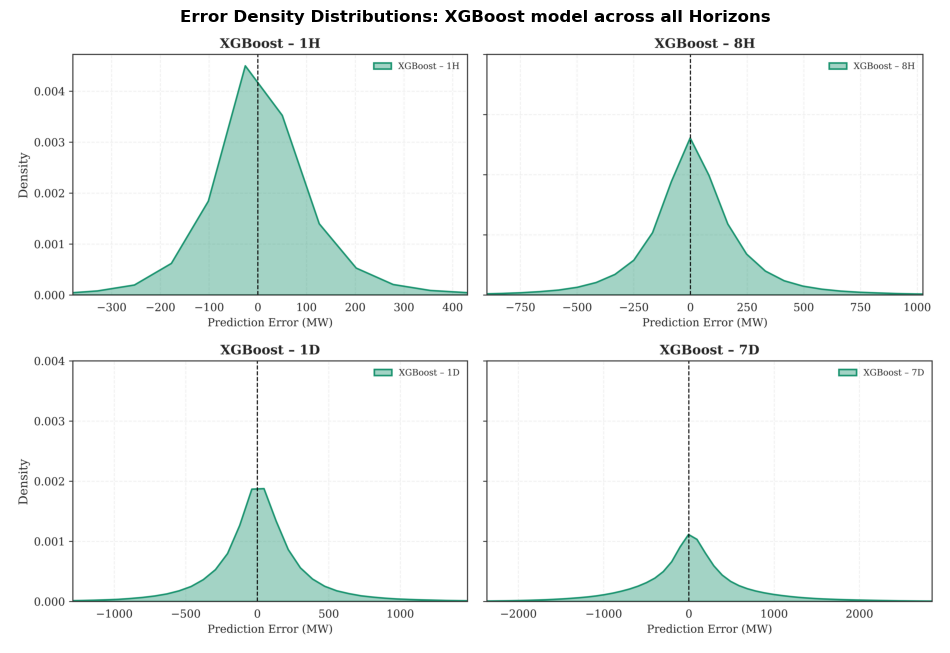

In [32]:
from PIL import Image
import matplotlib.pyplot as plt

#  Loading in all the four images
img1 = Image.open("XGBoost_Original_Data_1H_ErrorDensity.png")
img2 = Image.open("XGBoost_Original_Data_8H_ErrorDensity.png")
img3 = Image.open("XGBoost_Original_Data_1D_ErrorDensity.png")
img4 = Image.open("XGBoost_Original_Data_7D_ErrorDensity.png")  

# Resize the files to make it less large for overleaf
resize_factor = 0.5


#Resizing the images but making sure to keep the same ratio
img1_resized = img1.resize((int(img1.width * resize_factor), int(img1.height * resize_factor)))
img2_resized = img2.resize((int(img2.width * resize_factor), int(img2.height * resize_factor)))
img3_resized = img3.resize((int(img3.width * resize_factor), int(img3.height * resize_factor)))
img4_resized = img4.resize((int(img4.width * resize_factor), int(img4.height * resize_factor)))

# Computing sizes for the merged grid plot
top_height = max(img1_resized.height, img2_resized.height)
bottom_height = max(img3_resized.height, img4_resized.height)
total_width = max(img1_resized.width + img2_resized.width, img3_resized.width + img4_resized.width)
total_height = top_height + bottom_height

# Creating a blank canvas for pasting the new images
merged_img = Image.new('RGB', (total_width, total_height), color=(255, 255, 255))
merged_img.paste(img1_resized, (0, 0))
merged_img.paste(img2_resized, (img1_resized.width, 0))
merged_img.paste(img3_resized, (0, top_height))
merged_img.paste(img4_resized, (img3_resized.width, top_height))


plt.figure(figsize=(12, total_height / 100))
plt.imshow(merged_img)
plt.axis('off')
plt.title('Error Density Distributions: XGBoost model across all Horizons', fontsize=12, fontweight='bold')
plt.show()


merged_img.save("XGBoost_1H_8H_24H_168H_Merged_Grid_Density.pdf", format='PDF')


## Plots for Additional Dataset

## Flattened horizon hourly plot

## Erorr  actual vs predicted plot

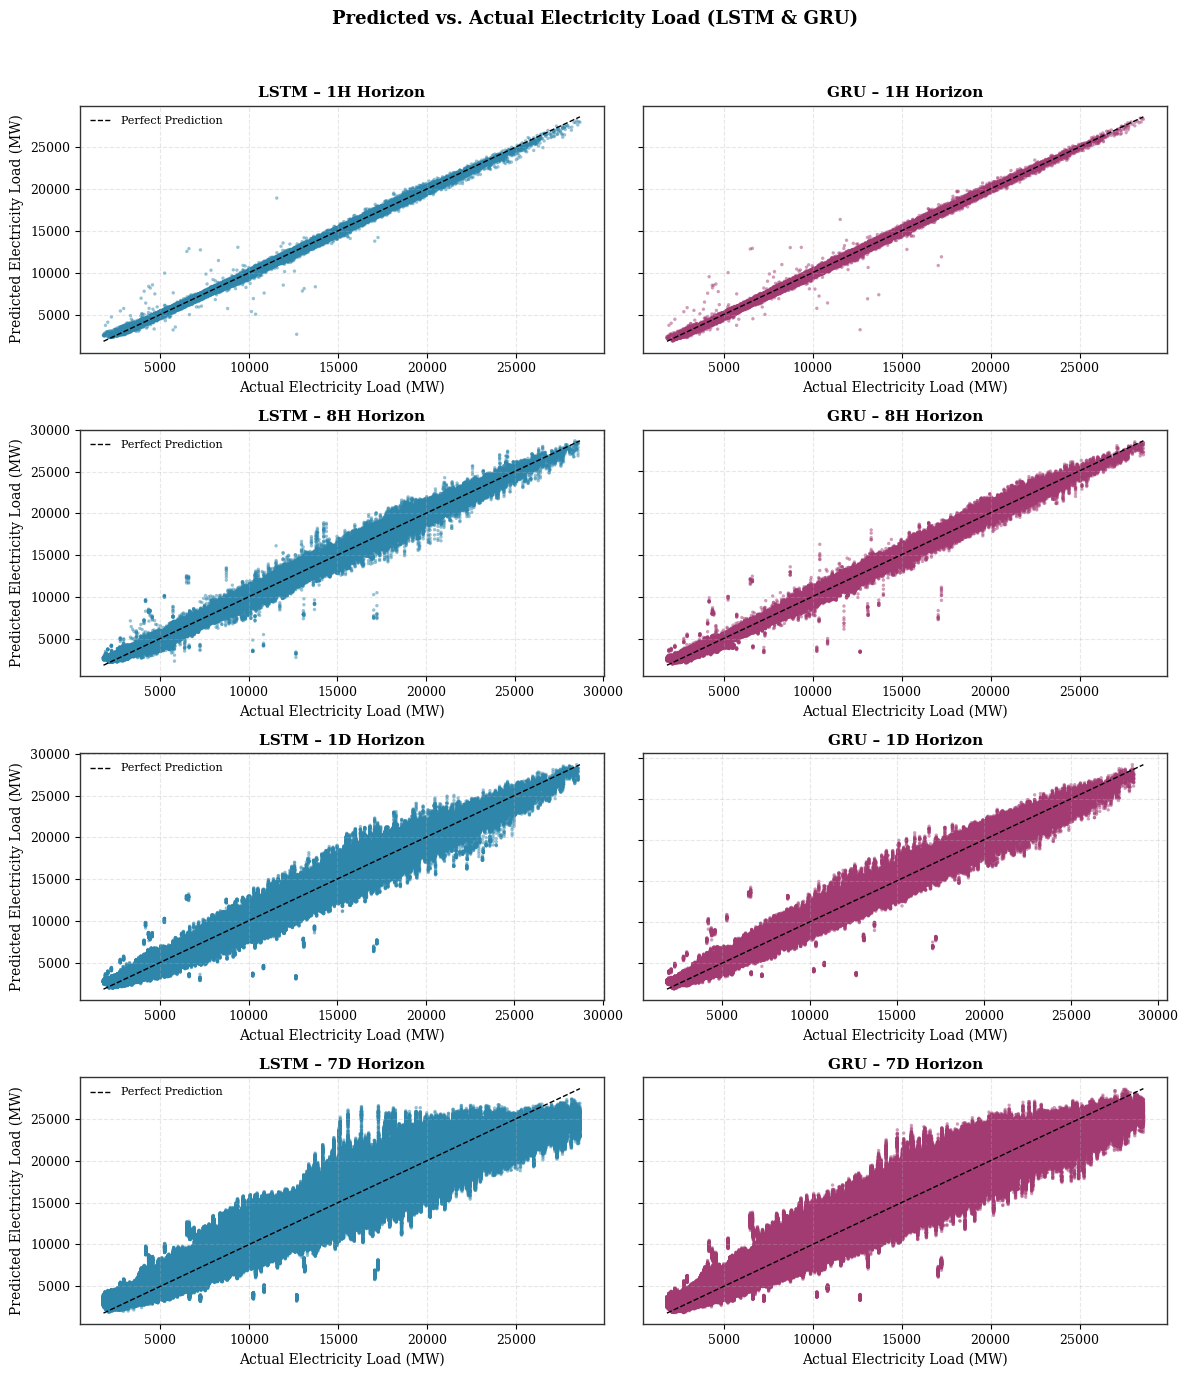

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting up all models and horizons
models = ['LSTM', 'GRU']
horizons = ['1H', '8H', '1D', '7D']

# Efficienter way for Loading the all the data  needed for plotting
data = {}
for model in models:
    for horizon in horizons:
        filename = f'v2GPU_Predictions_{model}_{horizon}_Additional_Data.csv'
        data[f'{model}_{horizon}'] = pd.read_csv(filename)

# Creating a professional style plot
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1

# Setting up the colors for the models
colors = {
    'LSTM': '#2E86AB',   # Deep blue
    'GRU':  '#A23B72'    # Magenta tone
}

# Creating figures with 4 rows and 2 columns 
fig, axes = plt.subplots(4, 2, figsize=(12, 14), sharex=False, sharey=False)

for i, horizon in enumerate(horizons):
    for j, model in enumerate(models):
        df = data[f'{model}_{horizon}']
        ax = axes[i, j]

         # Creating the scatter plot
        ax.scatter(df['y_true'], df['y_pred'], alpha=0.5, s=6, color=colors[model],
                   edgecolor='none', linewidths=0, rasterized=True)

        # Creating the perfect prediction line
        min_val = min(df['y_true'].min(), df['y_pred'].min())
        max_val = max(df['y_true'].max(), df['y_pred'].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1, label='Perfect Prediction')


        ax.set_title(f"{model} – {horizon} Horizon", fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3, linestyle='--', zorder=0)
        ax.tick_params(axis='x', labelsize=9)
        ax.tick_params(axis='y', labelsize=9)

         # Creating the ylabels
        if j == 0:
            ax.set_ylabel('Predicted Electricity Load (MW)', fontsize=10)
        else:
            ax.set_ylabel('')
            ax.set_yticklabels([])  
            ax.tick_params(axis='y', which='both', left=True, labelleft=False)


        ax.set_xlabel('Actual Electricity Load (MW)', fontsize=10)

        # Only giving the left column a legend
        if j == 0:
            ax.legend(frameon=False, fontsize=8, loc='upper left')


fig.suptitle("Predicted vs. Actual Electricity Load (LSTM & GRU)",
             fontsize=13, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("ErrorAnalysis_LSTM_GRU_AllHorizons_Exogenous.pdf", format='pdf', bbox_inches='tight')
plt.show()


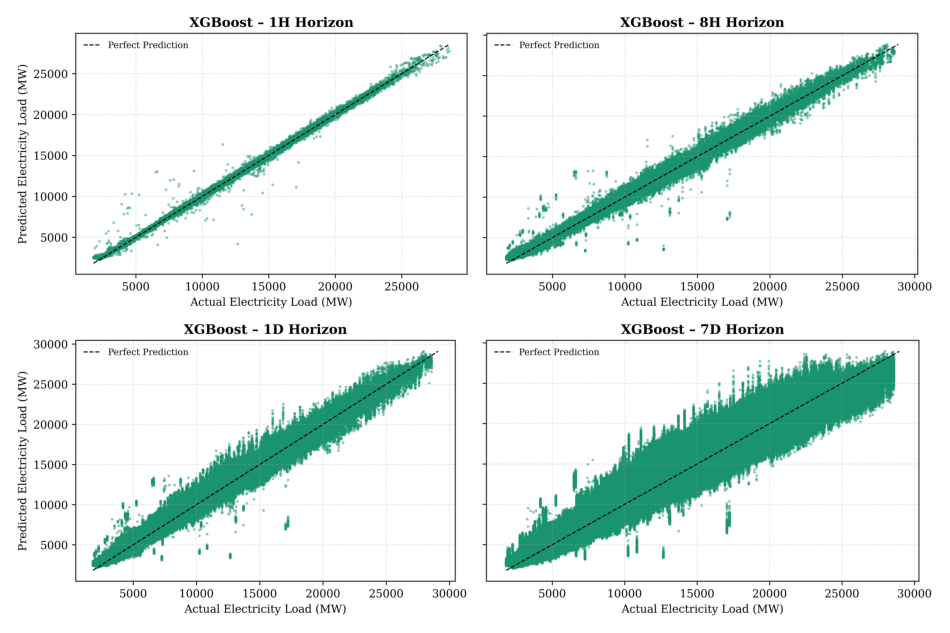

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

#  Loading in all the four images
img1 = Image.open("XGBoost_1H_Additional_Data_Prediction.png")
img2 = Image.open("XGBoost_8H_Additional_Data_Prediction.png")
img3 = Image.open("XGBoost_1D_Additional_Data_Prediction.png")
img4 = Image.open("XGBoost_7D_Additional_Data_Prediction.png")  # 7 days

# Resize the files to make it less large for overleaf
resize_factor = 0.5

#Resizing the images but making sure to keep the same ratio
img1_resized = img1.resize((int(img1.width * resize_factor), int(img1.height * resize_factor)))
img2_resized = img2.resize((int(img2.width * resize_factor), int(img2.height * resize_factor)))
img3_resized = img3.resize((int(img3.width * resize_factor), int(img3.height * resize_factor)))
img4_resized = img4.resize((int(img4.width * resize_factor), int(img4.height * resize_factor)))

# Computing sizes for the merged grid plot
top_height = max(img1_resized.height, img2_resized.height)
bottom_height = max(img3_resized.height, img4_resized.height)
total_width = max(img1_resized.width + img2_resized.width, img3_resized.width + img4_resized.width)
total_height = top_height + bottom_height

# Creating a blank canvas for pasting the new images
merged_img = Image.new('RGB', (total_width, total_height), color=(255, 255, 255))
merged_img.paste(img1_resized, (0, 0))
merged_img.paste(img2_resized, (img1_resized.width, 0))
merged_img.paste(img3_resized, (0, top_height))
merged_img.paste(img4_resized, (img3_resized.width, top_height))


plt.figure(figsize=(12, total_height / 100))
plt.imshow(merged_img)
plt.axis('off')
plt.show()


merged_img.save("ErrorAnalysis_XGBoost_AllHorizons_Merged_Grid_Exogenous.pdf", format='PDF')


## Error density distribution for plots

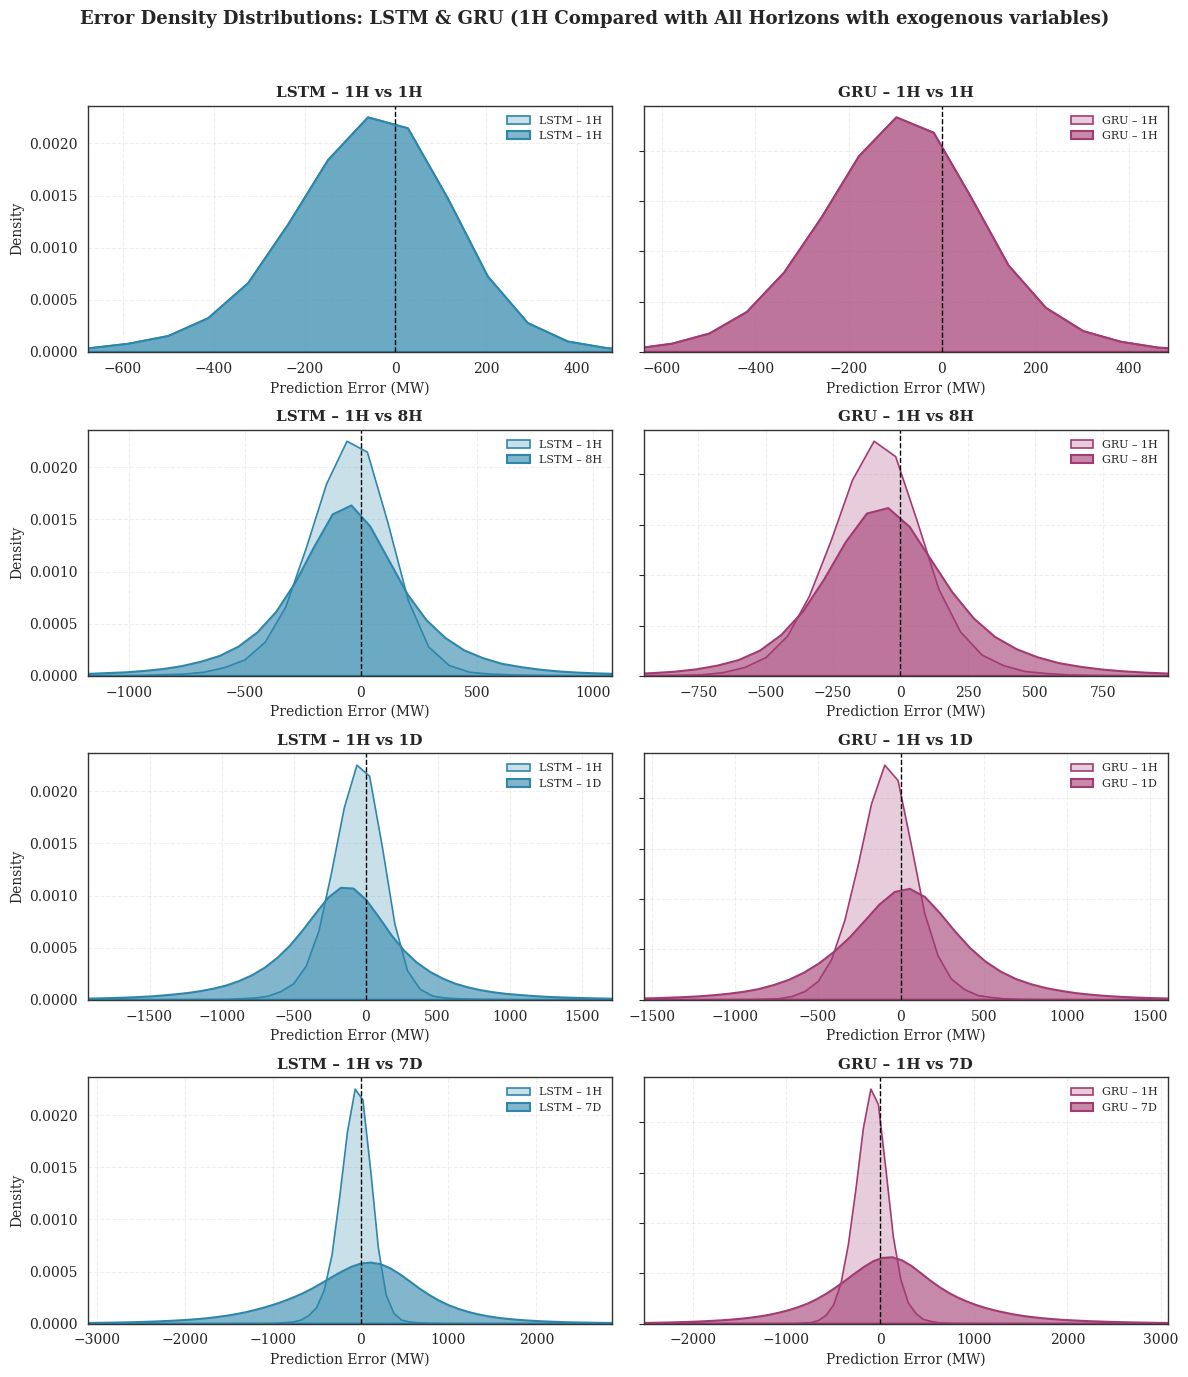

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setting up all models and horizons
models = ['LSTM', 'GRU']
horizons = ['1H', '8H', '1D', '7D']

#Loading the data efficienter for plotting
data = {}
for model in models:
    for horizon in horizons:
        filename = f'v2GPU_Predictions_{model}_{horizon}_Additional_Data.csv'
        df = pd.read_csv(filename)
        df['error'] = df['y_pred'] - df['y_true']
        data[f'{model}_{horizon}'] = df

# Creating a professional stype plote
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1

# Setting the colors for the models
colors = {
    'LSTM': '#2E86AB',   # Deep blue
    'GRU':  '#A23B72'    # Magenta tone
}

fig, axes = plt.subplots(4, 2, figsize=(12, 14), sharex=False, sharey=False)

# Comparing the horizons between eacherother. Setting up each horizon against the 1 Hour horizon
pairs = [('1H', '1H'), ('1H', '8H'), ('1H', '1D'), ('1H', '7D')]

for i, (short_h, compare_h) in enumerate(pairs):
    for j, model in enumerate(models):
        ax = axes[i, j]
        df_short = data[f'{model}_{short_h}']
        df_compare = data[f'{model}_{compare_h}']
        combined_errors = pd.concat([df_short['error'], df_compare['error']])
        xmin, xmax = np.percentile(combined_errors, [1, 99])  # focus on 1st–99th percentile
        margin = (xmax - xmin) * 0.1

       #Creating the plots 
        sns.kdeplot(
            df_short['error'],
            fill=True, alpha=0.25, color=colors[model],
            linewidth=1.2, ax=ax, label=f'{model} – {short_h}'
        )
        sns.kdeplot(
            df_compare['error'],
            fill=True, alpha=0.6, color=colors[model],
            linewidth=1.5, ax=ax, label=f'{model} – {compare_h}'
        )
        ax.axvline(0, color='k', linestyle='--', linewidth=1)
        ax.set_xlim(xmin - margin, xmax + margin)


        ax.set_title(f"{model} – 1H vs {compare_h}", fontsize=11, fontweight='bold')
        ax.set_xlabel("Prediction Error (MW)", fontsize=10)

        if j == 0:
            ax.set_ylabel("Density", fontsize=10)
        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])
            ax.tick_params(axis='y', which='both', left=True)

        ax.legend(frameon=False, fontsize=8, loc='upper right')
        ax.grid(alpha=0.3, linestyle='--')


fig.suptitle("Error Density Distributions: LSTM & GRU (1H Compared with All Horizons with exogenous variables)",
             fontsize=13, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig("ErrorDensity_LSTM_GRU_1H_vs_AllHorizons_With_Exogenous.pdf", format='pdf', bbox_inches='tight')
plt.show()


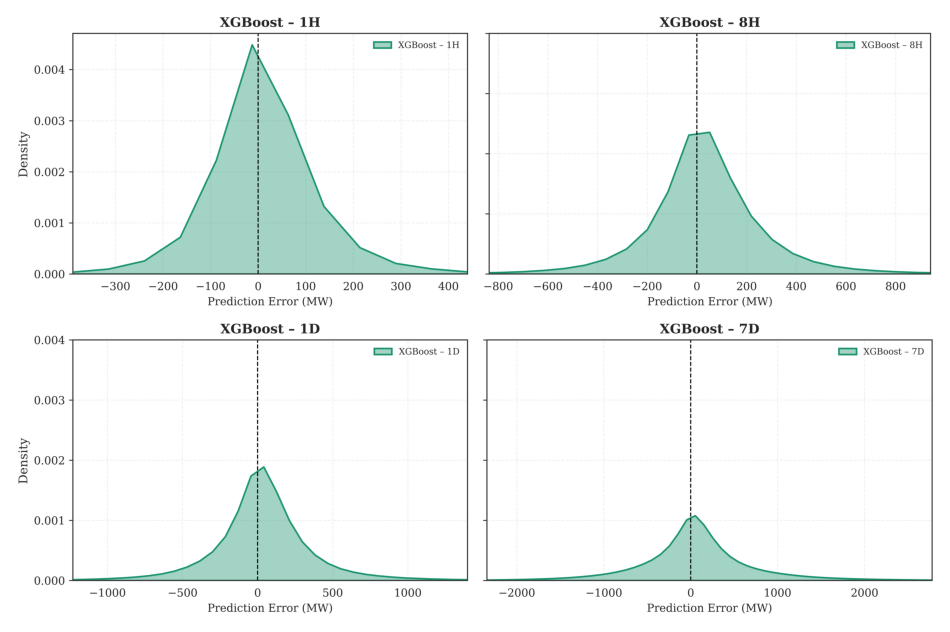

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

#  Loading in all the four images
img1 = Image.open("XGBoost_Additional_Data_1H_ErrorDensity.png")
img2 = Image.open("XGBoost_Additional_Data_8H_ErrorDensity.png")
img3 = Image.open("XGBoost_Additional_Data_1D_ErrorDensity.png")
img4 = Image.open("XGBoost_Additional_Data_7D_ErrorDensity.png")  

# Resize the files to make it less large for overleaf
resize_factor = 0.5

#Resizing the images but making sure to keep the same ratio
img1_resized = img1.resize((int(img1.width * resize_factor), int(img1.height * resize_factor)))
img2_resized = img2.resize((int(img2.width * resize_factor), int(img2.height * resize_factor)))
img3_resized = img3.resize((int(img3.width * resize_factor), int(img3.height * resize_factor)))
img4_resized = img4.resize((int(img4.width * resize_factor), int(img4.height * resize_factor)))

# Computing sizes for the merged grid plot
top_height = max(img1_resized.height, img2_resized.height)
bottom_height = max(img3_resized.height, img4_resized.height)
total_width = max(img1_resized.width + img2_resized.width, img3_resized.width + img4_resized.width)
total_height = top_height + bottom_height

# Creating a blank canvas for pasting the new images
merged_img = Image.new('RGB', (total_width, total_height), color=(255, 255, 255))
merged_img.paste(img1_resized, (0, 0))
merged_img.paste(img2_resized, (img1_resized.width, 0))
merged_img.paste(img3_resized, (0, top_height))
merged_img.paste(img4_resized, (img3_resized.width, top_height))


plt.figure(figsize=(12, total_height / 100))
plt.imshow(merged_img)
plt.axis('off')
plt.show()


merged_img.save("ErrorDensity_XGBoost_AllHorizons_Merged_Grid_Exogenous.pdf", format='PDF')


## Comparison plots

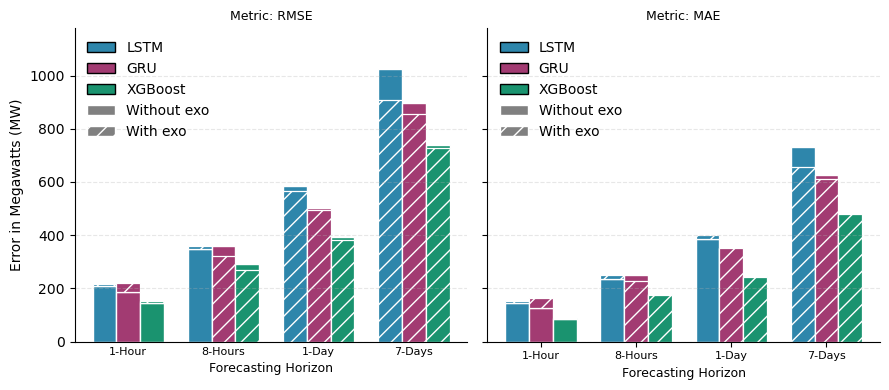

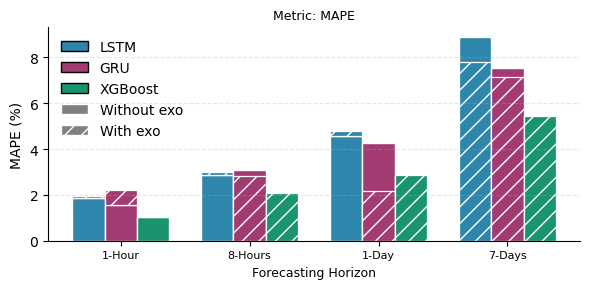

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

#Setting up all the horizons, models and colors for later use
horizons = ['1-Hour', '8-Hours', '1-Day', '7-Days']
models = ['LSTM', 'GRU', 'XGBoost']
colors = ['#2E86AB', '#A23B72', '#1A936F']

# Adding the RMSE data for all models manually
rmse_no_exo = np.array([
    [211.12, 347.74, 585.28, 1023.68],   # LSTM: Original
    [185.26, 358.33, 501.74, 898.32],    # GRU: Original
    [147.00, 290.44, 393.23, 739.70]     # XGBoost: Original
])
rmse_exo = np.array([
    [217.03, 361.15, 566.50, 909.88],    # LSTM: Additional
    [221.64, 320.27, 493.47, 856.58],    # GRU: Additional
    [152.69, 268.95, 381.24, 728.19]     # XGBoost: Additional
])

# Adding the MAE data for all models manually
mae_no_exo = np.array([
    [146.56, 237.06, 385.84, 731.22],    # LSTM: Original
    [124.99, 249.57, 352.63, 627.72],    # GRU: Original
    [84.60, 178.13, 247.70, 482.58]      # XGBoost: Original
])
mae_exo = np.array([
    [154.25, 249.53, 399.28, 657.65],    # LSTM: Additional
    [162.75, 229.22, 351.22, 611.04],    # GRU: Additional
    [88.58, 173.84, 244.48, 478.98]      # XGBoost: Additional
])

# Adding the MAPE data for all models manually
mape_no_exo = np.array([
    [1.87, 2.89, 4.57, 8.87],            # LSTM: Original
    [1.55, 3.10, 4.28, 7.52],            # GRU: Original
    [1.02, 2.10, 2.89, 5.47]             # XGBoost: Original
])
mape_exo = np.array([
    [1.95, 2.99, 4.81, 7.78],            # LSTM: Additional
    [2.21, 2.82, 2.19, 7.15],            # GRU: Additional
    [1.10, 2.07, 2.86, 5.46]             # XGBoost: Additional
])

#Creating the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
x = np.arange(len(horizons))
width = 0.25

#Creating a shared y-ax
ymax = max(rmse_no_exo.max(), rmse_exo.max(), mae_no_exo.max(), mae_exo.max()) * 1.15

# This section is for creating of the RMSE
for i, model in enumerate(models):
    ax1.bar(x + (i - 1) * width, rmse_no_exo[i], width, color=colors[i], edgecolor='white')
    for j in range(len(horizons)):
        no_exo = rmse_no_exo[i, j]
        exo = rmse_exo[i, j]
        if exo < no_exo:
            ax1.bar(x[j] + (i - 1) * width, exo, width, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)
        else:
            ax1.bar(x[j] + (i - 1) * width, exo - no_exo, width, bottom=no_exo, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)

ax1.set_xticks(x)
ax1.set_xlabel('Forecasting Horizon', fontsize=9)
ax1.set_xticklabels(horizons, fontsize=8)
ax1.set_ylabel("Error in Megawatts (MW)", fontsize=10)
ax1.set_title("Metric: RMSE", fontsize=9)
ax1.set_ylim(0, ymax)
ax1.grid(axis='y', linestyle='--', alpha=0.3, zorder = 0)
ax1.xaxis.grid(False)       
ax1.tick_params(axis='x', length=0) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# legend for RMSE plot
handles = [Patch(facecolor=colors[i], edgecolor='black', label=models[i]) for i in range(3)]
handles.append(Patch(facecolor='grey', edgecolor='white', label='Without exo'))
handles.append(Patch(facecolor='grey', edgecolor='white', hatch='//', label='With exo'))
ax1.legend(handles=handles, frameon=False, loc='upper left')

#This section is for creation of the MAE plot
for i, model in enumerate(models):
    ax2.bar(x + (i - 1) * width, mae_no_exo[i], width, color=colors[i], edgecolor='white')
    for j in range(len(horizons)):
        no_exo = mae_no_exo[i, j]
        exo = mae_exo[i, j]
        if exo < no_exo:
            ax2.bar(x[j] + (i - 1) * width, exo, width, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)
        else:
            ax2.bar(x[j] + (i - 1) * width, exo - no_exo, width, bottom=no_exo, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)

ax2.set_xlabel('Forecasting Horizon', fontsize=9)
ax2.set_xticks(x)
ax2.set_xticklabels(horizons, fontsize=8)
ax2.set_title("Metric: MAE", fontsize=9)
ax2.set_ylim(0, ymax)
ax2.grid(axis='y', linestyle='--', alpha=0.3, zorder = 0)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_yticklabels([])

ax2.legend(handles=handles, frameon=False, loc='upper left')

fig.align_ylabels([ax1, ax2])
plt.tight_layout()
plt.savefig("RMSE_MAE_comparison_Datasets.pdf", format='pdf', bbox_inches='tight')
plt.show()

#This section is for the creating of the MAPE plot
plt.figure(figsize=(6, 3))
for i, model in enumerate(models):
    plt.bar(x + (i - 1) * width, mape_no_exo[i], width, color=colors[i], edgecolor='white')
    for j in range(len(horizons)):
        no_exo = mape_no_exo[i, j]
        exo = mape_exo[i, j]
        if exo < no_exo:
            plt.bar(x[j] + (i - 1) * width, exo, width, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)
        else:
            plt.bar(x[j] + (i - 1) * width, exo - no_exo, width, bottom=no_exo, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)

plt.xlabel('Forecasting Horizon', fontsize=9)
plt.xticks(x, horizons, fontsize=8)
plt.ylabel("MAPE (%)", fontsize=10)
plt.title("Metric: MAPE", fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(handles=handles, frameon=False, loc='upper left')

plt.tight_layout()
plt.savefig("MAPE_comparison_Datasets.pdf", format='pdf', bbox_inches='tight')

plt.show()


## Regional comparison on 1 hour horizon

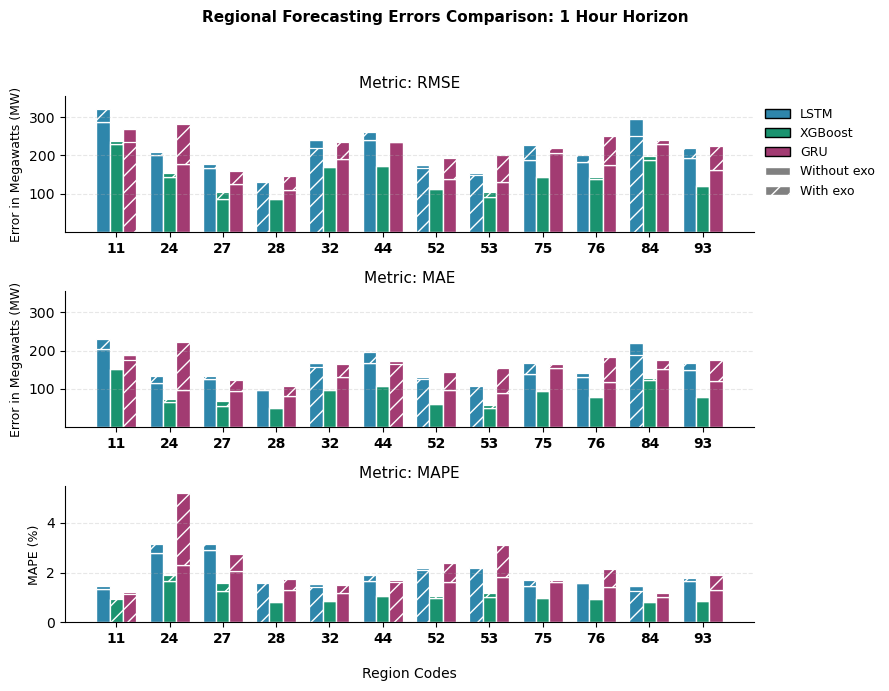

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Setting up all the region codes so i can use it on the plot
regions = ['11','24','27','28','32','44','52','53','75','76','84','93']
x = np.arange(len(regions))

# Setting up the models and colors and width
models = ['LSTM', 'XGBoost', 'GRU']
colors = ['#2E86AB', '#1A936F', '#A23B72']
width = 0.25

# Manually adding the RMSE of the models of the basic dataset
rmse_no_exo = np.array([
    [288.10,201.28,168.58,133.80,241.32,240.29,175.29,154.92,188.61,183.76,295.11,194.70],  # LSTM
    [231.05,143.04,87.76,86.74,169.77,173.54,112.69,92.77,144.14,138.40,187.80,121.70],   # XGBoost
    [267.87,178.24,126.89,111.11,191.12,234.73,137.78,131.17,205.77,174.10,229.74,163.24]  # GRU
])

# Manually adding the MAE of the models of the basic dataset
mae_no_exo = np.array([
    [204.90,116.06,125.78,96.95,167.44,167.19,131.03,110.14,137.86,132.12,219.99,149.26],  # LSTM
    [151.23,66.64,55.30,50.88,97.05,107.81,59.65,51.02,95.27,79.75,122.30,78.31],          # XGBoost
    [187.98,96.89,94.93,80.56,131.91,173.15,97.96,89.89,154.34,118.87,152.28,121.08]       # GRU
])

# Manually adding the MAPE of the models of the basic dataset
mape_no_exo = np.array([
    [1.34,2.79,2.89,1.62,1.55,1.68,2.20,2.24,1.45,1.57,1.48,1.65],  # LSTM
    [0.96,1.65,1.26,0.82,0.87,1.06,0.98,1.01,0.99,0.93,0.82,0.86],  # XGBoost
    [1.23,2.29,2.07,1.30,1.18,1.70,1.62,1.81,1.62,1.41,1.04,1.32]   # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
rmse_exo = np.array([
    [321.79,208.07,177.60,129.92,218.33,261.76,167.32,148.01,226.45,201.92,251.46,220.40],  # LSTM
    [236.98,153.43,105.26,87.34,171.81,173.81,114.94,104.47,147.21,144.99,199.34,122.88],  # XGBoost
    [236.38,280.93,160.15,145.69,235.50,235.37,192.52,201.08,219.75,249.68,241.60,224.66]  # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
mae_exo = np.array([
    [230.69,133.62,134.61,97.79,157.97,197.22,124.81,106.98,168.47,142.72,187.66,168.48],  # LSTM
    [151.34,74.24,67.58,52.20,97.23,111.28,63.69,57.09,96.40,81.98,129.74,80.19],          # XGBoost
    [174.30,223.09,124.04,108.33,164.54,163.83,142.88,153.44,165.24,183.87,174.35,175.11]  # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
mape_exo = np.array([
    [1.46,3.15,3.14,1.57,1.42,1.92,2.12,2.19,1.70,1.63,1.27,1.80],  # LSTM
    [0.95,1.89,1.60,0.84,0.88,1.09,1.05,1.20,1.00,0.95,0.88,0.87],  # XGBoost
    [1.16,5.20,2.74,1.76,1.52,1.63,2.40,3.10,1.72,2.13,1.19,1.92]   # GRU
])


#Creating a shared y-ax for RMSE and MAE
ymax = max(rmse_no_exo.max(), rmse_exo.max(), mae_no_exo.max(), mae_exo.max()) * 1.10

# Creating the plots
fig, axes = plt.subplots(3, 1, figsize=(9, 7), sharex=False)

metrics_no_exo = [rmse_no_exo, mae_no_exo, mape_no_exo]
metrics_exo = [rmse_exo, mae_exo, mape_exo]
metric_names = ['Metric: RMSE', 'Metric: MAE', 'Metric: MAPE']

for ax, name, no_exo, exo in zip(axes, metric_names, metrics_no_exo, metrics_exo):
    for i, model in enumerate(models):
        ax.bar(x - width + i*width, no_exo[i], width, color=colors[i], edgecolor='white')
        for j in range(len(regions)):
            base = no_exo[i,j]
            top = exo[i,j]
            if top < base:
                ax.bar(x[j] - width + i*width, top, width, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)
            else:
                ax.bar(x[j] - width + i*width, top - base, width, bottom=base, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)

    # creating custom labels 
    if name in ['Metric: RMSE', 'Metric: MAE']:
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
        ax.set_ylim(0, ymax)
        ax.set_yticks([100, 200, 300]) 
    else:  # # label for MAP
        ax.set_ylabel('MAPE (%)', fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=10, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.grid(axis='x', visible=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(name, fontsize=11)
    if name != 'Metric: MAPE':
        ax.set_ylim(0, ymax)


#Creating the legend
handles = [Patch(facecolor=colors[i], edgecolor='black', label=models[i]) for i in range(3)]
handles.append(Patch(facecolor='grey', edgecolor='white', label='Without exo'))
handles.append(Patch(facecolor='grey', edgecolor='white', hatch='//', label='With exo'))
axes[0].legend(handles=handles, frameon=False, loc='upper left', bbox_to_anchor=(1,1), fontsize=9)

#Setting a general xlabel 
axes[-1].set_xlabel('Region Codes', fontsize=10, labelpad=15)

fig.suptitle('Regional Forecasting Errors Comparison: 1 Hour Horizon', fontsize=11, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Regional_Forecasting_Comparison_datasets_1Hour.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Regional comparison on 8 hour horizon

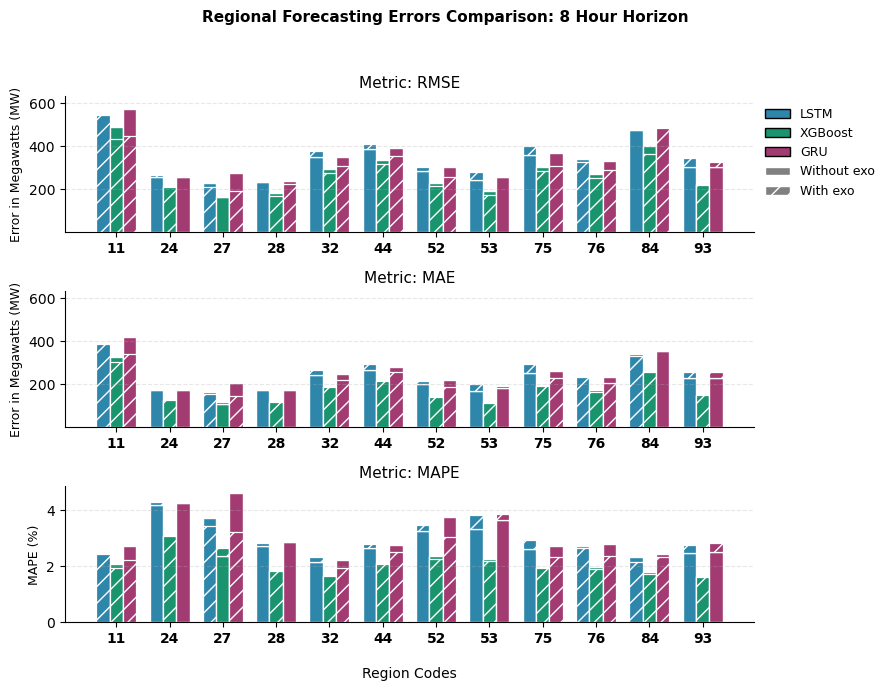

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Setting up all the region codes so i can use it on the plot
regions = ['11','24','27','28','32','44','52','53','75','76','84','93']
x = np.arange(len(regions)) 

# Setting up the models and colors and width
models = ['LSTM', 'XGBoost', 'GRU']
colors = ['#2E86AB', '#1A936F', '#A23B72']
width = 0.25

# Manually adding the RMSE of the models of the basic dataset
rmse_no_exo = np.array([
    [547.38,258.34,227.32,235.03,350.76,388.27,287.06,244.63,360.79,339.42,473.66,303.39],  # LSTM
    [491.28,215.38,164.68,182.57,295.47,334.43,230.29,190.14,302.79,271.60,398.74,226.57],  # XGBoost
    [574.26,255.54,273.28,236.35,349.72,392.02,304.55,255.30,369.53,333.12,491.03,304.38]   # GRU
])

# Manually adding the MAE of the models of the basic dataset
mae_no_exo = np.array([
    [388.34,175.32,164.80,172.94,245.14,268.63,200.59,169.84,254.39,234.52,342.09,228.15],  # LSTM
    [325.17,128.64,107.78,119.21,192.49,216.63,145.45,118.02,196.95,171.41,263.28,152.56],  # XGBoost
    [421.78,174.58,206.52,175.22,248.22,279.19,221.10,183.45,263.17,235.47,355.98,230.20]   # GRU
])

# Manually adding the MAPE of the models of the basic dataset
mape_no_exo = np.array([
    [2.46,4.18,3.73,2.72,2.16,2.64,3.27,3.31,2.63,2.73,2.34,2.46],  # LSTM
    [2.07,3.10,2.38,1.88,1.70,2.11,2.35,2.26,1.99,1.96,1.78,1.64],  # XGBoost
    [2.71,4.26,4.61,2.85,2.21,2.76,3.74,3.65,2.72,2.78,2.43,2.49]   # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
rmse_exo = np.array([
    [542.81,264.60,212.24,237.26,377.69,410.04,304.03,280.79,400.97,328.22,477.48,347.27],  # LSTM
    [435.51,208.91,168.92,167.36,274.65,315.90,214.04,174.91,286.25,253.55,364.47,217.89],  # XGBoost
    [449.17,262.81,194.21,226.10,307.18,353.20,259.18,256.16,307.52,289.00,482.71,328.97]   # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
mae_exo = np.array([
    [386.51,180.48,155.84,179.36,266.14,294.02,216.73,199.94,295.45,232.77,330.15,256.92],  # LSTM
    [304.24,126.20,116.31,116.48,186.20,215.76,141.54,114.17,192.60,165.47,256.03,151.09],  # XGBoost
    [342.11,179.57,144.63,175.86,218.98,258.75,188.82,193.31,229.12,204.04,356.56,258.85]   # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
mape_exo = np.array([
    [2.42,4.27,3.42,2.83,2.33,2.80,3.47,3.83,2.94,2.66,2.16,2.74],  # LSTM
    [1.93,3.07,2.64,1.83,1.64,2.09,2.27,2.20,1.94,1.89,1.73,1.62],  # XGBoost
    [2.21,4.27,3.23,2.86,1.95,2.51,3.03,3.87,2.33,2.37,2.33,2.82]   # GRU
])

#Creating a shared y-ax for RMSE and MAE
ymax = max(rmse_no_exo.max(), rmse_exo.max(), mae_no_exo.max(), mae_exo.max()) * 1.10

# Creating the plots
fig, axes = plt.subplots(3, 1, figsize=(9, 7), sharex=False)

metrics_no_exo = [rmse_no_exo, mae_no_exo, mape_no_exo]
metrics_exo = [rmse_exo, mae_exo, mape_exo]
metric_names = ['Metric: RMSE', 'Metric: MAE', 'Metric: MAPE']

for ax, name, no_exo, exo in zip(axes, metric_names, metrics_no_exo, metrics_exo):
    for i, model in enumerate(models):
        ax.bar(x - width + i*width, no_exo[i], width, color=colors[i], edgecolor='white')
        for j in range(len(regions)):
            base = no_exo[i,j]
            top = exo[i,j]
            if top < base:
                ax.bar(x[j] - width + i*width, top, width, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)
            else:
                ax.bar(x[j] - width + i*width, top - base, width, bottom=base, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)

     # creating custom labels 
    if name in ['Metric: RMSE', 'Metric: MAE']:
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
        ax.set_ylim(0, ymax)
        ax.set_yticks([200, 400, 600, 800])
    else: # label for MAPE
        ax.set_ylabel('MAPE (%)', fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=10, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.grid(axis='x', visible=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(name, fontsize=11)
    if name != 'Metric: MAPE':
        ax.set_ylim(0, ymax)

#Creating the legend
handles = [Patch(facecolor=colors[i], edgecolor='black', label=models[i]) for i in range(3)]
handles.append(Patch(facecolor='grey', edgecolor='white', label='Without exo'))
handles.append(Patch(facecolor='grey', edgecolor='white', hatch='//', label='With exo'))
axes[0].legend(handles=handles, frameon=False, loc='upper left', bbox_to_anchor=(1,1), fontsize=9)

#Setting a general xlabel 
axes[-1].set_xlabel('Region Codes', fontsize=10, labelpad=15)

fig.suptitle('Regional Forecasting Errors Comparison: 8 Hour Horizon', fontsize=11, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Regional_Forecasting_Comparison_datasets_8hour.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Regional comparison on 24 hour

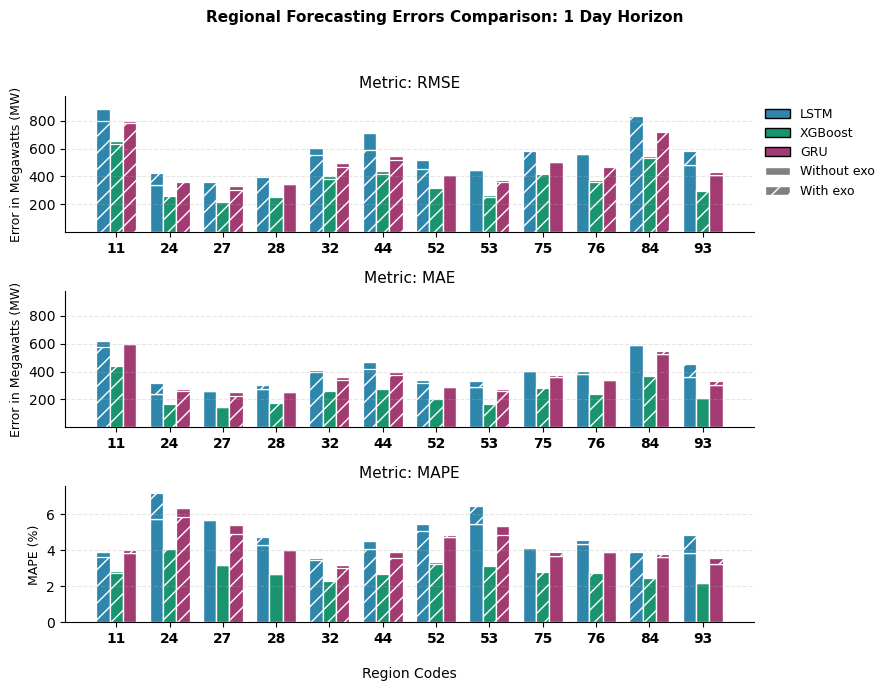

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Setting up all the region codes so i can use it on the plot
regions = ['11','24','27','28','32','44','52','53','75','76','84','93']
x = np.arange(len(regions))  # base positions

# Setting up the models and colors and width
models = ['LSTM', 'XGBoost', 'GRU']
colors = ['#2E86AB', '#1A936F', '#A23B72']
width = 0.25

# Manually adding the RMSE of the models of the basic dataset
rmse_no_exo = np.array([
    [885.09,337.92,362.35,395.82,601.56,711.48,514.29,444.60,582.69,561.33,840.05,484.22],  # LSTM
    [655.63,265.65,219.18,260.57,400.95,436.33,327.92,265.78,425.61,372.35,546.76,301.90],  # XGBoost
    [798.69,367.40,330.19,346.10,497.66,549.21,409.39,374.87,501.41,473.92,720.99,407.43]   # GRU
])

# Manually adding the MAE of the models of the basic dataset
mae_no_exo = np.array([
    [618.15,239.92,259.77,274.52,411.46,465.38,338.14,288.98,405.06,382.75,588.19,357.74],  # LSTM
    [449.85,171.46,144.10,173.79,265.89,283.80,208.99,170.14,284.01,246.20,365.87,208.24],  # XGBoost
    [594.84,272.52,250.74,253.89,361.37,394.66,291.29,275.31,363.75,339.66,527.39,306.09]   # GRU
])

# Manually adding the MAPE of the models of the basic dataset
mape_no_exo = np.array([
    [3.89,5.77,5.66,4.28,3.57,4.51,5.47,5.46,4.11,4.38,3.93,3.85],  # LSTM
    [2.84,4.11,3.17,2.70,2.33,2.76,3.33,3.21,2.81,2.79,2.46,2.21],  # XGBoost
    [3.88,6.38,5.39,4.00,3.21,3.89,4.77,5.33,3.69,3.89,3.63,3.26]   # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
rmse_exo = np.array([
    [797.73,427.34,357.56,394.66,552.35,587.72,456.64,448.21,578.73,564.47,833.25,583.64],  # LSTM
    [632.73,259.73,217.94,252.56,385.35,419.01,315.15,252.61,418.10,362.01,531.40,299.26],  # XGBoost
    [786.00,358.36,303.30,348.19,468.13,518.54,409.49,357.83,506.19,466.30,718.47,434.79]   # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
mae_exo = np.array([
    [574.21,316.71,269.69,301.53,395.00,420.82,319.85,335.66,412.26,404.47,589.90,451.32],  # LSTM
    [441.23,168.98,146.91,173.53,261.30,277.22,203.48,163.97,282.10,241.59,365.16,208.34],  # XGBoost
    [604.11,259.13,226.01,256.56,341.57,372.49,298.67,257.34,378.43,339.72,545.68,334.94]   # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
mape_exo = np.array([
    [3.62,7.19,5.73,4.72,3.46,4.05,5.05,6.49,4.12,4.57,3.89,4.84],  # LSTM
    [2.77,4.06,3.27,2.71,2.29,2.69,3.23,3.11,2.80,2.74,2.45,2.22],  # XGBoost
    [4.01,5.85,4.93,4.01,3.00,3.60,4.87,4.85,3.89,3.92,3.79,3.58]   # GRU
])

#Creating a shared y-ax for RMSE and MAE
ymax = max(rmse_no_exo.max(), rmse_exo.max(), mae_no_exo.max(), mae_exo.max()) * 1.10

# Creating the plots
fig, axes = plt.subplots(3, 1, figsize=(9, 7), sharex=False)

metrics_no_exo = [rmse_no_exo, mae_no_exo, mape_no_exo]
metrics_exo = [rmse_exo, mae_exo, mape_exo]
metric_names = ['Metric: RMSE', 'Metric: MAE', 'Metric: MAPE']

for ax, name, no_exo, exo in zip(axes, metric_names, metrics_no_exo, metrics_exo):
    for i, model in enumerate(models):
        ax.bar(x - width + i*width, no_exo[i], width, color=colors[i], edgecolor='white')
        for j in range(len(regions)):
            base = no_exo[i,j]
            top = exo[i,j]
            if top < base:
                ax.bar(x[j] - width + i*width, top, width, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)
            else:
                ax.bar(x[j] - width + i*width, top - base, width, bottom=base, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)

    # creating custom labels 
    if name in ['Metric: RMSE', 'Metric: MAE']:
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
        ax.set_ylim(0, ymax)
        ax.set_yticks([200, 400, 600, 800])  # set shared y-ticks
    else:  # label for MAPE
        ax.set_ylabel('MAPE (%)', fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=10, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.grid(axis='x', visible=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(name, fontsize=11)
    if name != 'Metric: MAPE':
        ax.set_ylim(0, ymax)

#Creating the legend
handles = [Patch(facecolor=colors[i], edgecolor='black', label=models[i]) for i in range(3)]
handles.append(Patch(facecolor='grey', edgecolor='white', label='Without exo'))
handles.append(Patch(facecolor='grey', edgecolor='white', hatch='//', label='With exo'))
axes[0].legend(handles=handles, frameon=False, loc='upper left', bbox_to_anchor=(1,1), fontsize=9)

#Setting a general xlabel 
axes[-1].set_xlabel('Region Codes', fontsize=10, labelpad=15)
fig.suptitle('Regional Forecasting Errors Comparison: 1 Day Horizon', fontsize=11, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Regional_Forecasting_Comparison_1Day.pdf", format='pdf', bbox_inches='tight')
plt.show()


## regional comparison on 7 day horizon

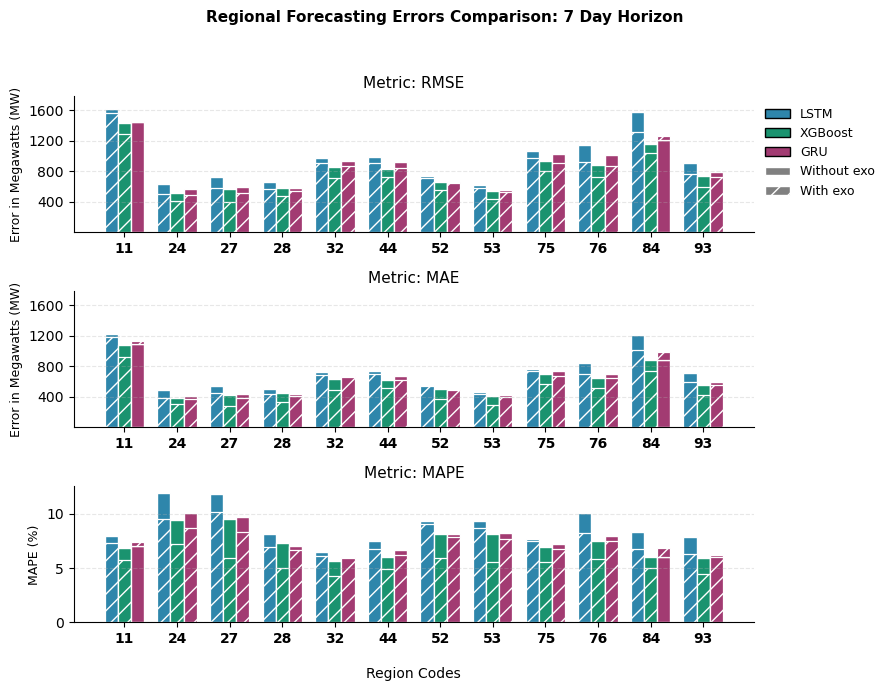

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Setting up all the region codes so i can use it on the plot
regions = ['11','24','27','28','32','44','52','53','75','76','84','93']
x = np.arange(len(regions))  # base positions

# Setting up the models and colors and width
models = ['LSTM', 'XGBoost', 'GRU']
colors = ['#2E86AB', '#1A936F', '#A23B72']
width = 0.25

# Manually adding the RMSE of the models of the basic dataset
rmse_no_exo = np.array([
    [1618.44,637.43,719.81,662.75,969.20,989.88,732.96,614.56,1062.97,1139.42,1581.19,909.43],  # LSTM
    [1428.47,511.62,561.26,579.76,853.69,831.42,664.44,544.72,933.99,879.08,1157.12,734.03],  # XGBoost
    [1441.24,566.29,591.80,582.45,928.59,917.67,660.40,554.53,1023.60,1008.19,1206.81,792.31]  # GRU
])

# Manually adding the MAE of the models of the basic dataset
mae_no_exo = np.array([
    [1228.61,486.51,540.33,503.41,724.02,743.99,554.02,465.49,763.47,847.15,1208.48,709.14],  # LSTM
    [1072.79,389.36,425.65,450.75,639.30,619.81,501.96,414.21,693.03,649.63,884.08,559.32],  # XGBoost
    [1088.43,417.06,430.58,438.56,669.64,670.65,493.26,419.54,731.71,702.68,879.92,590.60]  # GRU
])

# Manually adding the MAPE of the models of the basic dataset
mape_no_exo = np.array([
    [7.98,11.93,11.82,8.14,6.49,7.47,9.30,9.31,7.69,10.05,8.37,7.83],  # LSTM
    [6.87,9.45,9.50,7.35,5.68,6.03,8.18,8.16,6.98,7.50,6.03,5.92],  # XGBoost
    [7.00,10.08,9.71,7.04,6.00,6.64,8.11,8.24,7.21,7.98,6.01,6.23]  # GRU
])


# Manually adding the RMSE of the models of the enriched dataset
rmse_exo = np.array([
    [1565.00,498.51,582.54,573.15,904.37,909.62,715.21,578.89,971.96,916.89,1309.68,759.22],  # LSTM
    [1292.31,413.47,390.78,471.74,707.26,729.03,548.28,442.04,806.43,727.34,1039.31,599.70],  # XGBoost
    [1462.57,492.66,508.49,543.39,863.16,836.43,649.10,530.83,912.37,869.38,1266.67,727.11]  # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
mae_exo = np.array([
    [1185.59,387.69,449.64,441.15,688.60,699.25,547.62,441.19,740.54,702.49,1016.62,591.47],  # LSTM
    [922.62,300.97,274.00,328.24,492.07,512.87,373.28,297.31,566.07,516.00,740.01,424.29],  # XGBoost
    [1135.14,370.05,379.32,413.61,656.89,625.87,485.96,397.18,673.26,647.98,986.31,560.85]  # GRU
])

# Manually adding the RMSE of the models of the enriched dataset
mape_exo = np.array([
    [7.30,9.49,10.16,6.95,6.10,6.72,9.11,8.69,7.54,8.25,6.78,6.30],  # LSTM
    [5.73,7.21,5.97,5.04,4.27,4.96,5.90,5.61,5.58,5.84,4.98,4.43],  # XGBoost
    [7.40,8.74,8.32,6.68,5.91,6.17,7.91,7.68,6.74,7.47,6.83,5.99]  # GRU
])

#Creating a shared y-ax for RMSE and MAE
ymax = max(rmse_no_exo.max(), rmse_exo.max(), mae_no_exo.max(), mae_exo.max()) * 1.10

# Creating the plots
fig, axes = plt.subplots(3, 1, figsize=(9, 7), sharex=False)
metrics_no_exo = [rmse_no_exo, mae_no_exo, mape_no_exo]
metrics_exo = [rmse_exo, mae_exo, mape_exo]
metric_names = ['Metric: RMSE', 'Metric: MAE', 'Metric: MAPE']

for ax, name, no_exo, exo in zip(axes, metric_names, metrics_no_exo, metrics_exo):
    for i, model in enumerate(models):
        ax.bar(x - width + i*width, no_exo[i], width, color=colors[i], edgecolor='white')
        for j in range(len(regions)):
            base = no_exo[i,j]
            top = exo[i,j]
            if top < base:
                ax.bar(x[j] - width + i*width, top, width, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)
            else:
                ax.bar(x[j] - width + i*width, top - base, width, bottom=base, color=colors[i], edgecolor='white', hatch='//', linewidth=0.9)

    # creating custom labels 
    if name in ['Metric: RMSE', 'Metric: MAE']:
        ax.set_ylabel('Error in Megawatts (MW)', fontsize=9)
        ax.set_ylim(0, ymax)
        ax.set_yticks([400, 800, 1200, 1600])
    else:# label for MAPE
        ax.set_ylabel('MAPE (%)', fontsize=9)
        
    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=10, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.grid(axis='x', visible=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(name, fontsize=11)
    if name != 'Metric: MAPE':
        ax.set_ylim(0, ymax)

#Creating the legend
handles = [Patch(facecolor=colors[i], edgecolor='black', label=models[i]) for i in range(3)]
handles.append(Patch(facecolor='grey', edgecolor='white', label='Without exo'))
handles.append(Patch(facecolor='grey', edgecolor='white', hatch='//', label='With exo'))
axes[0].legend(handles=handles, frameon=False, loc='upper left', bbox_to_anchor=(1,1), fontsize=9)

#Setting a general xlabel 
axes[-1].set_xlabel('Region Codes', fontsize=10, labelpad=15)
fig.suptitle('Regional Forecasting Errors Comparison: 7 Day Horizon', fontsize=11, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Regional_Forecasting_Comparison_Datasets_7Day.pdf", format='pdf', bbox_inches='tight')
plt.show()


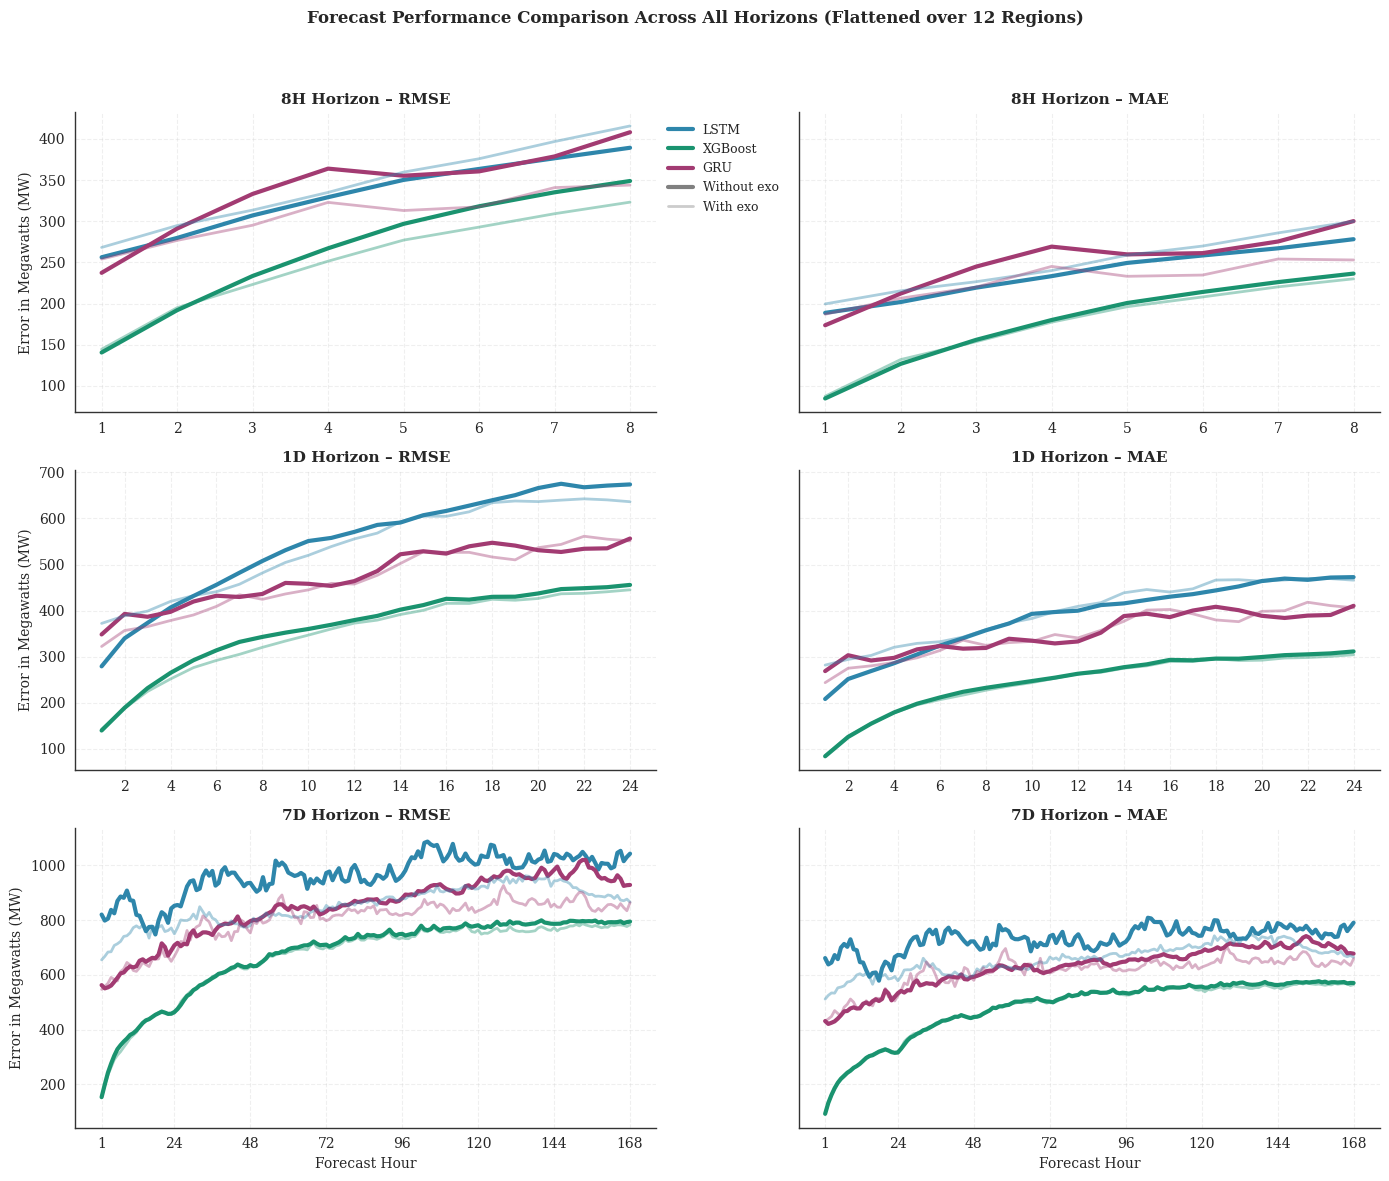

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Loading all the basic flattened data of all models
xgb_8h  = pd.read_csv('flattened_xgboost_8h_original.xls')
lstm_8h = pd.read_csv('v2flattened_lstm_8h_original.csv')
gru_8h  = pd.read_csv('v2flattened_gru_8h_original.csv')

xgb_24h  = pd.read_csv('flattened_xgboost_24h_original.xls')
lstm_24h = pd.read_csv('v2flattened_lstm_24h_original.csv')
gru_24h  = pd.read_csv('v2flattened_gru_24h_original.csv')

xgb_168h  = pd.read_csv('flattened_xgboost_168h_original.xls')
lstm_168h = pd.read_csv('v2flattened_lstm_168h_original.csv')
gru_168h  = pd.read_csv('v2flattened_gru_168h_original.csv')

# Loading all the enriched flattened data of all models
xgb_8h_exo  = pd.read_csv('flattened_xgboost_8h_additional.csv')
lstm_8h_exo = pd.read_csv('v2flattened_lstm_8h_additional.csv')
gru_8h_exo  = pd.read_csv('v2flattened_gru_8h_additional.csv')

xgb_24h_exo  = pd.read_csv('flattened_xgboost_24h_additional.csv')
lstm_24h_exo = pd.read_csv('v2flattened_lstm_24h_additional.csv')
gru_24h_exo  = pd.read_csv('v2flattened_gru_24h_additional.csv')

xgb_168h_exo  = pd.read_csv('flattened_xgboost_168h_additional.csv')
lstm_168h_exo = pd.read_csv('v2flattened_lstm_168h_additional.csv')
gru_168h_exo  = pd.read_csv('v2flattened_gru_168h_additional.csv')

# setting the models and colors efficienter to make it easier in pltos
colors = {'LSTM':'#2E86AB', 'XGBoost':'#1A936F', 'GRU':'#A23B72'}

# Setting the data up organized for further use
horizons = ['8H','1D','7D']
xgb_data  = [xgb_8h, xgb_24h, xgb_168h]
lstm_data = [lstm_8h, lstm_24h, lstm_168h]
gru_data  = [gru_8h, gru_24h, gru_168h]

xgb_exo  = [xgb_8h_exo, xgb_24h_exo, xgb_168h_exo]
lstm_exo = [lstm_8h_exo, lstm_24h_exo, lstm_168h_exo]
gru_exo  = [gru_8h_exo, gru_24h_exo, gru_168h_exo]


#Creating the ticks for each horizon
xticks_dict = {
    '8H':  [1, 2, 3, 4, 5, 6, 7, 8],
    '1D': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
    '7D':  [1, 24, 48, 72, 96, 120, 144, 168]
}


# Creating the subplots 
fig, axes = plt.subplots(3,2, figsize=(14,12), sharey='row')

for i, horizon in enumerate(horizons):
    #Creating the RMSE plot, this will go on the left
    ax = axes[i,0]
    # plotline of the RMSE of the basic dataset, line also made more darker, so if i need to adjust for better visiblity
    ax.plot(xgb_data[i]['horizon'], xgb_data[i]['RMSE'], color=colors['XGBoost'], linewidth=3, alpha=1.0)
    ax.plot(lstm_data[i]['horizon'], lstm_data[i]['RMSE'], color=colors['LSTM'], linewidth=3, alpha=1.0)
    ax.plot(gru_data[i]['horizon'], gru_data[i]['RMSE'], color=colors['GRU'], linewidth=3, alpha=1.0)

    #plotline of the RMSE of the basic dataset, line also made more lighter so if i need to adjust for better comparison 
    ax.plot(xgb_exo[i]['horizon'], xgb_exo[i]['RMSE'], color=colors['XGBoost'], linewidth=2, alpha=0.4)
    ax.plot(lstm_exo[i]['horizon'], lstm_exo[i]['RMSE'], color=colors['LSTM'], linewidth=2, alpha=0.4)
    ax.plot(gru_exo[i]['horizon'], gru_exo[i]['RMSE'], color=colors['GRU'], linewidth=2, alpha=0.4)

    #Creating titles and labels
    ax.set_title(f'{horizon} Horizon – RMSE', fontsize=11, fontweight='bold')
    ax.set_ylabel('Error in Megawatts (MW)', fontsize=10)
    ax.grid(alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.set_xticks(xticks_dict[horizon]) 
    ax.spines['right'].set_visible(False)

   #Creating the MAE plot, this will go on the right
    ax = axes[i,1]
    # plotline of the MAE of the basic dataset, line also made more darker, so if i need to adjust for better visiblity.
    ax.plot(xgb_data[i]['horizon'], xgb_data[i]['MAE'], color=colors['XGBoost'], linewidth=3, alpha=1.0)
    ax.plot(lstm_data[i]['horizon'], lstm_data[i]['MAE'], color=colors['LSTM'], linewidth=3, alpha=1.0)
    ax.plot(gru_data[i]['horizon'], gru_data[i]['MAE'], color=colors['GRU'], linewidth=3, alpha=1.0)

    #plotline of the MAE of the basic dataset, line also made more lighter so if i need to adjust for better comparison 
    ax.plot(xgb_exo[i]['horizon'], xgb_exo[i]['MAE'], color=colors['XGBoost'], linewidth=2, alpha=0.4)
    ax.plot(lstm_exo[i]['horizon'], lstm_exo[i]['MAE'], color=colors['LSTM'], linewidth=2, alpha=0.4)
    ax.plot(gru_exo[i]['horizon'], gru_exo[i]['MAE'], color=colors['GRU'], linewidth=2, alpha=0.4)

    #Creatng titles and labels
    ax.set_title(f'{horizon} Horizon – MAE', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.set_xticks(xticks_dict[horizon])  
    ax.spines['right'].set_visible(False)
    

#Making sure the plots have shared x-asses
for ax in axes[-1,:]:
    ax.set_xlabel('Forecast Hour', fontsize=10)

#Creating the general legend
legend_handles = [
    Line2D([0],[0], color=colors['LSTM'], linewidth=3, label='LSTM'),
    Line2D([0],[0], color=colors['XGBoost'], linewidth=3, label='XGBoost'),
    Line2D([0],[0], color=colors['GRU'], linewidth=3, label='GRU'),
    Line2D([0],[0], color='grey', linewidth=3, alpha=1.0, label='Without exo'),
    Line2D([0],[0], color='grey', linewidth=2, alpha=0.4, label='With exo')
]
axes[0,0].legend(handles=legend_handles, frameon=False, fontsize=9, loc='upper left', bbox_to_anchor=(1,1))

fig.suptitle('Forecast Performance Comparison Across All Horizons (Flattened over 12 Regions)', fontsize=12, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("Flattened_AllHorizons_RMSE_MAE_Comparison.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Electricity Consumption

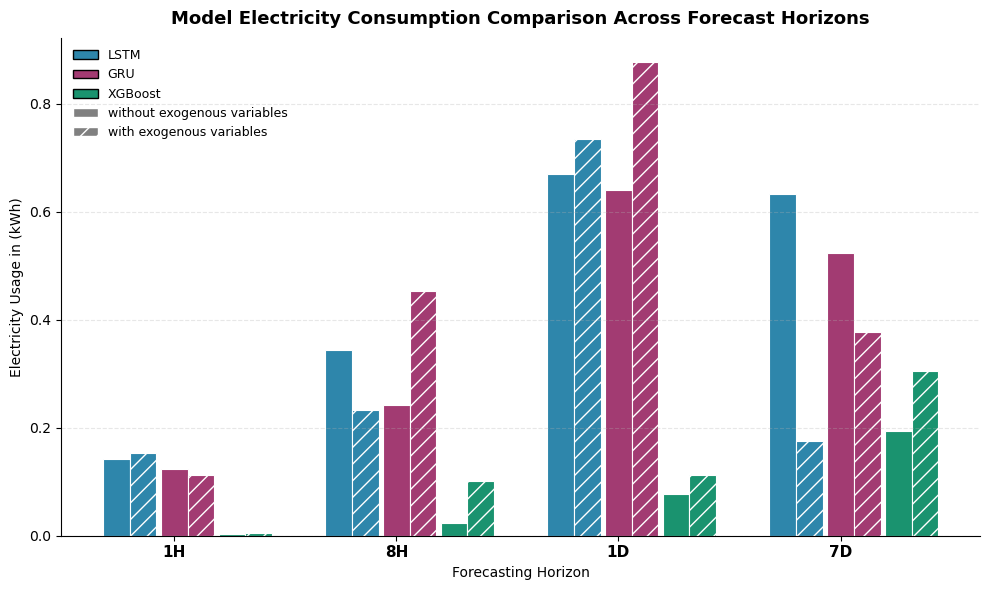

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


# Setting up the horizons, models and colors and width
horizons = ['1H', '8H', '1D', '7D']
models = ['LSTM', 'GRU', 'XGBoost']
colors = ['#2E86AB', '#A23B72', '#1A936F']
width = 0.12  # slim bars

#Manually adding the electricity numbers for each model 
elec_use_original = np.array([
    [0.142674674738, 0.344650709129, 0.668925800890, 0.632188508296],  # LSTM
    [0.124083757334, 0.242461349325, 0.640943498100, 0.522902800394],  # GRU
    [0.003773748450, 0.023335397123, 0.076356656777, 0.193435612322]   # XGBoost
])
elec_use_additional = np.array([
    [0.152627861654, 0.232711838727, 0.734880270807, 0.175089694326],  # LSTM
    [0.112241912949, 0.453168180686, 0.877841169563, 0.376340449500],  # GRU
    [0.005667570758, 0.101947559260, 0.112397527171, 0.304947462526]   # XGBoost
])


#Creating the plot
x = np.arange(len(horizons))
fig, ax = plt.subplots(figsize=(10, 6))


#Making the bars have the same space between and creating a hatched bar with // and the color white.
for i, model in enumerate(models):
    offset = (i - 1) * (2 * width + 0.02)  
    ax.bar(x + offset, elec_use_original[i], width, color=colors[i],
           edgecolor='white', label=f'{model} - Original' if i == 0 else "", linewidth=0.8)
    ax.bar(x + offset + width, elec_use_additional[i], width, color=colors[i],
           edgecolor='white', hatch='//', label=f'{model} - Additional' if i == 0 else "", linewidth=0.8)



ax.set_xticks(x)
ax.set_xlabel('Forecasting Horizon', fontsize=10)
ax.set_xticklabels(horizons, fontsize=11, fontweight='bold')
ax.set_ylabel('Electricity Usage in (kWh)', fontsize=10)
ax.set_title('Model Electricity Consumption Comparison Across Forecast Horizons', fontsize=13, fontweight='bold', pad=10)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.grid(axis='x', visible=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Creating the legend
handles = []
for i, model in enumerate(models):
    handles.append(Patch(facecolor=colors[i], edgecolor='black', label=model))
handles.append(Patch(facecolor='grey', edgecolor='white', label='without exogenous variables'))
handles.append(Patch(facecolor='grey', edgecolor='white', hatch='//', label='with exogenous variables'))
ax.legend(handles=handles, frameon=False, loc='upper left', fontsize=9)


plt.tight_layout()
plt.savefig("Electricity_Usage_Comparison_AllModels.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Feature Importance Summarized

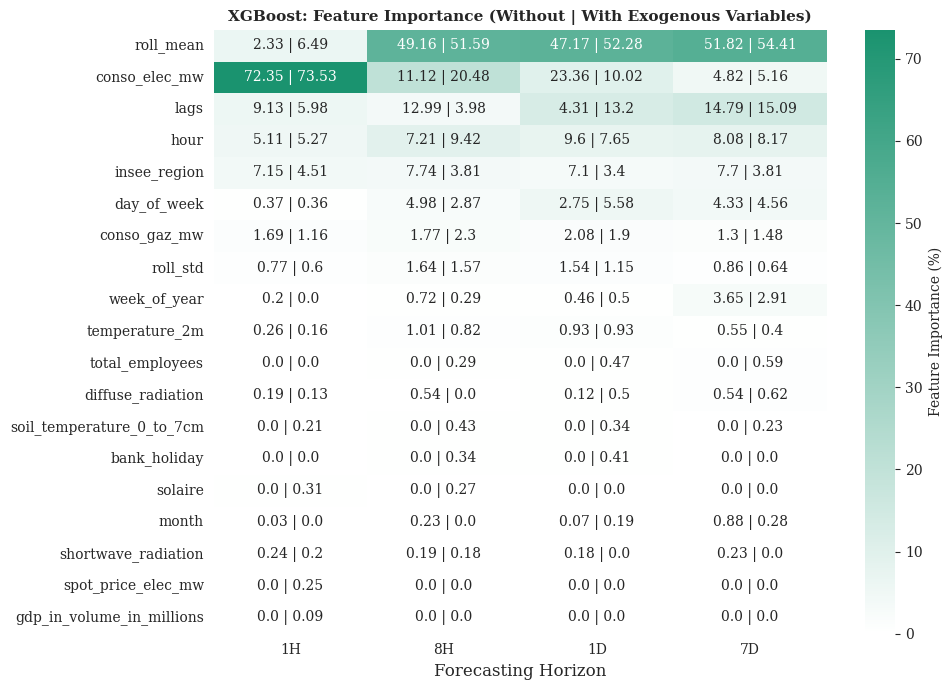

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Manually adding the right features to use for the basic dataset with the corresponding percentage number
data_without = {
    'feature': [
        'conso_elec_mw', 'lags', 'insee_region', 'hour', 'roll_mean',
        'day_of_week', 'week_of_year', 'conso_gaz_mw', 'roll_std',
        'temperature_2m', 'diffuse_radiation', 'shortwave_radiation',
        'month', 'quarter', 'pressure_msl', 'wind_direction_10m', 'soil_moisture_0_to_7cm'
    ],
    '1H':   [72.35, 9.13, 7.15, 5.11, 2.33, 0.37, 0.20, 1.69, 0.77, 0.26, 0.19, 0.24, 0.03, 0.08, 0, 0, 0.02],
    '8H':   [11.12, 12.99, 7.74, 7.21, 49.16, 4.98, 0.72, 1.77, 1.64, 1.01, 0.54, 0.19, 0.23, 0.03, 0.10, 0.19, 0.19],
    '1D':   [23.36, 4.31, 7.10, 9.60, 47.17, 2.75, 0.46, 2.08, 1.54, 0.93, 0.12, 0.18, 0.07, 0.03, 0.05, 0.19, 0.03],
    '7D':   [4.82, 14.79, 7.70, 8.08, 51.82, 4.33, 3.65, 1.30, 0.86, 0.55, 0.54, 0.23, 0.88, 0, 0.14, 0.09, 0]
}
df_without = pd.DataFrame(data_without)

# Manually adding the right features to use for the enriched dataset with the corresponding percentage number
data_with = {
    'feature': [
        'conso_elec_mw', 'roll_mean', 'lags', 'hour', 'day_of_week', 'insee_region',
        'roll_std', 'week_of_year', 'conso_gaz_mw', 'temperature_2m', 'diffuse_radiation',
        'total_employees', 'month', 'soil_temperature_0_to_7cm',
        'bank_holiday', 'solaire', 'shortwave_radiation', 'spot_price_elec_mw',
        'gdp_in_volume_in_millions'
    ],
    '1H':   [73.53, 6.49, 5.98, 5.27, 0.36, 4.51, 0.60, 0, 1.16, 0.16, 0.13, 0, 0, 0.21, 0, 0.31, 0.20, 0.25, 0.09],
    '8H':   [20.48, 51.59, 3.98, 9.42, 2.87, 3.81, 1.57, 0.29, 2.30, 0.82, 0, 0.29, 0, 0.43, 0.34, 0.27, 0.18, 0, 0],
    '1D':   [10.02, 52.28, 13.20, 7.65, 5.58, 3.40, 1.15, 0.50, 1.90, 0.93, 0.50, 0.47, 0.19, 0.34, 0.41, 0, 0, 0, 0],
    '7D':   [5.16, 54.41, 15.09, 8.17, 4.56, 3.81, 0.64, 2.91, 1.48, 0.40, 0.62, 0.59, 0.28, 0.23, 0, 0, 0, 0, 0]
}
df_with = pd.DataFrame(data_with)


#Sorting the feature importance by the mean between basic and enriched dataset and also selecting the first 19 numbers
df_with['mean_importance'] = df_with[['1H','8H','1D','7D']].mean(axis=1)
df_with = df_with.sort_values('mean_importance', ascending=False).head(19)



#Making sure to filter the same 19 features in the basic dataset
selected_features = df_with['feature'].tolist()
df_without = df_without.set_index('feature').reindex(selected_features)
df_with = df_with.set_index('feature').reindex(selected_features)


#Filling the missing values of the basic dataset that do not contain the exogenous features with 0.0
df_without = df_without.fillna(0.0)
df_with = df_with.fillna(0.0)


#Creating the labels of without | with exogenous features for better comparison
labels = (
    df_without[['1H','8H','1D','7D']].round(2).astype(str)
    + " | "
    + df_with[['1H','8H','1D','7D']].round(2).astype(str)
)


# making sure that the color bar is based on the with exogenous features scores
color_data = df_with[['1H','8H','1D','7D']]

# giving the figure the the same color as the color used in all other plots showing XGBoost
xgb_cmap = LinearSegmentedColormap.from_list("xgb_cmap", ["#ffffff", "#1A936F"])

#Creating the plot
plt.figure(figsize=(10, 7))
sns.heatmap(
    color_data,
    annot=labels,
    fmt='',
    cmap=xgb_cmap,
    cbar_kws={'label': 'Feature Importance (%)'}
)

plt.title("XGBoost: Feature Importance (Without | With Exogenous Variables)", fontsize=11, weight='bold')
plt.xlabel("Forecasting Horizon", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.savefig("XGBoost_Permutation_Importance.pdf", format='pdf', bbox_inches='tight')
plt.show()


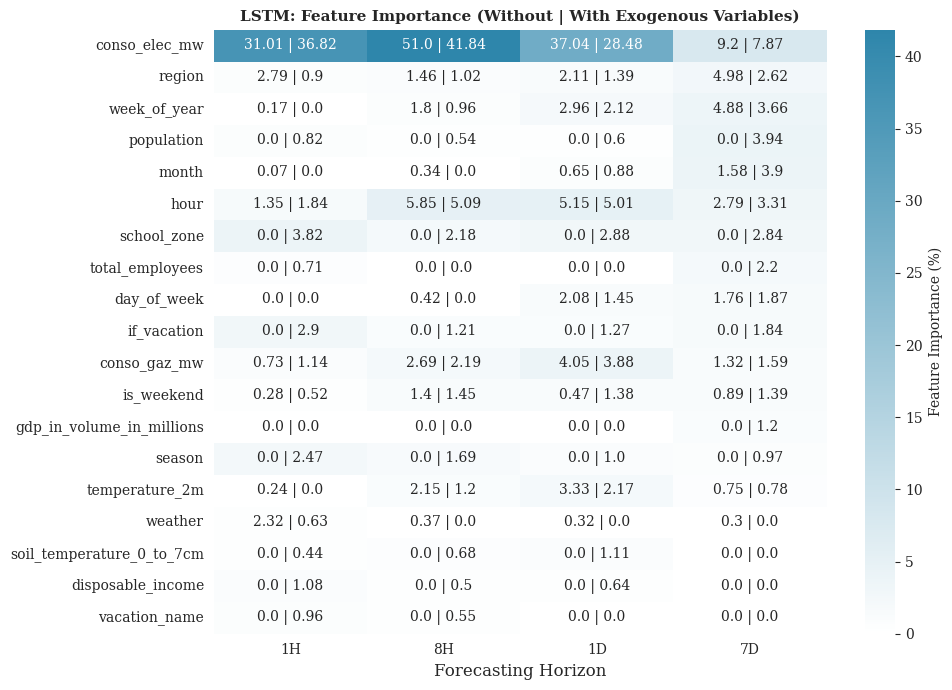

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Manually adding the right features to use for the basic dataset with the corresponding percentage number
data_without = {
    'feature': [
        'conso_elec_mw','hour','conso_gaz_mw','region','temperature_2m',
        'week_of_year','weather','day_of_week','shortwave_radiation','is_weekend',
        'month','quarter','diffuse_radiation','sunshine_duration','cloud_cover',
        'wind_direction_10m','cloud_cover_high'
    ],
    '1H': [31.009,1.351,0.730,2.787,0.242,0.171,2.316,0,0.304,0.278,0.074,0.077,0.180,0.214,0.045,0,0],
    '8H': [50.997,5.848,2.694,1.463,2.154,1.796,0.369,0.415,0.963,1.400,0.341,0.532,0.932,0.136,0,0,0],
    '1D': [37.038,5.153,4.049,2.107,3.333,2.963,0.320,2.079,0.626,0.473,0.651,1.049,0.365,0.225,0,0.195,0],
    '7D': [9.196,2.792,1.325,4.977,0.748,4.881,0.300,1.756,0,0.891,1.580,0.383,0,0,0.593,0,0.379]
}

df_without = pd.DataFrame(data_without)

# Manually adding the right features to use for the enriched dataset with the corresponding percentage number
data_with = {
    'feature': [
        'conso_elec_mw','hour','school_zone','if_vacation','conso_gaz_mw',
        'season','region','is_weekend','population','disposable_income',
        'week_of_year','temperature_2m','soil_temperature_0_to_7cm','day_of_week',
        'total_employees','vacation_name','gdp_in_volume_in_millions','weather','month'
    ],
    '1H': [36.821,1.844,3.821,2.903,1.139,2.472,0.895,0.520,0.823,1.085,0,0,0.441,0,0.714,0.961,0,0.633,0.0],
    '8H': [41.843,5.092,2.179,1.213,2.195,1.686,1.019,1.452,0.542,0.499,0.964,1.201,0.678,0,0,0.548,0.0,0,0.0],
    '1D': [28.479,5.009,2.880,1.266,3.877,0.998,1.393,1.383,0.603,0.640,2.120,2.175,1.106,1.448,0,0,0,0,0.880],
    '7D': [7.871,3.308,2.835,1.843,1.593,0.973,2.617,1.386,3.941,0,3.664,0.782,0,1.873,2.201,0,1.196,0,3.905]
}

df_with = pd.DataFrame(data_with)

#Sorting the feature importance by the mean between basic and enriched dataset and also selecting the first 19 numbers
df_with['mean_importance'] = df_with[['1H','8H','1D','7D']].mean(axis=1)
df_with = df_with.sort_values('mean_importance', ascending=False).head(19)

#Making sure to filter the same 19 features in the basic dataset
selected_features = df_with['feature'].tolist()
df_without = df_without.set_index('feature').reindex(selected_features)
df_with = df_with.set_index('feature').reindex(selected_features)

#Filling the missing values of the basic dataset that do not contain the exogenous features with 0.0
df_without = df_without.fillna(0.0)
df_with = df_with.fillna(0.0)

#Sorting based on the 7day horizon
max_1D = df_without['7D'].combine(df_with['7D'], max)
df_without = df_without.loc[max_1D.sort_values(ascending=False).index]
df_with = df_with.loc[max_1D.sort_values(ascending=False).index]

#Creating the labels of without | with exogenous features for better comparison
labels = (
    df_without[['1H','8H','1D','7D']].round(2).astype(str)
    + " | "
    + df_with[['1H','8H','1D','7D']].round(2).astype(str)
)

# making sure that the color bar is based on the with exogenous features scores
color_data = df_with[['1H','8H','1D','7D']]

# giving the figure the the same color as the color used in all other plots showing LSTM
lstm_cmap = LinearSegmentedColormap.from_list("lstm_cmap", ["#ffffff", "#2E86AB"])

# Creating the plot
plt.figure(figsize=(10, 7))
sns.heatmap(
    color_data,
    annot=labels,
    fmt='',
    cmap=lstm_cmap,
    cbar_kws={'label': 'Feature Importance (%)'}
)

plt.title("LSTM: Feature Importance (Without | With Exogenous Variables)", fontsize=11, weight='bold')
plt.xlabel("Forecasting Horizon", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.savefig("LSTM_Permutation_Importance.pdf", format='pdf', bbox_inches='tight')
plt.show()


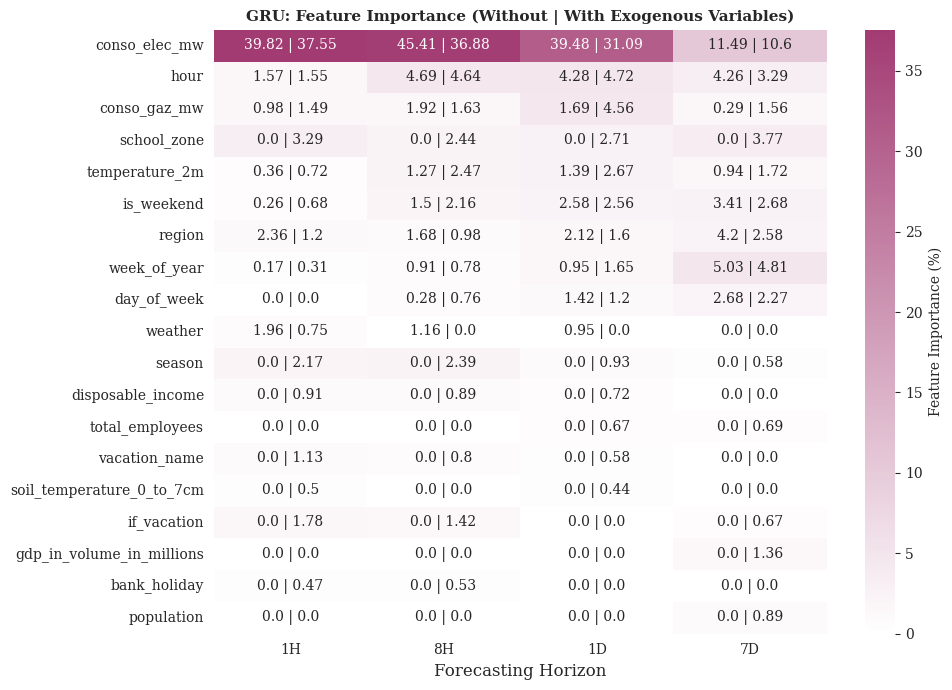

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Manually adding the right features to use for the basic dataset with the corresponding percentage number
data_without = {
    'feature': [
        'conso_elec_mw','hour','school_zone','season','if_vacation','conso_gaz_mw','region','vacation_name',
        'disposable_income','weather','temperature_2m','is_weekend','soil_temperature_0_to_7cm','bank_holiday',
        'week_of_year','day_of_week','total_employees','gdp_in_volume_in_millions','population'
    ],
    '1H': [39.818,1.566,0.0,0.0,0.0,0.978,2.355,0.0,0.0,1.963,0.358,0.265,0.0,0.0,0.174,0.0,0.0,0.0,0.0],
    '8H': [45.409,4.690,0.0,0.0,0.0,1.921,1.675,0.0,0.0,1.165,1.270,1.500,0.0,0.0,0.913,0.282,0.0,0.0,0.0],
    '1D': [39.479,4.275,0.0,0.0,0.0,1.694,2.117,0.0,0.0,0.946,1.387,2.585,0.0,0.0,0.949,1.418,0.0,0.0,0.0],
    '7D': [11.488,4.255,0.0,0.0,0.0,0.293,4.196,0.0,0.0,0.0,0.940,3.412,0.0,0.0,5.029,2.675,0.0,0.0,0.0]
}
df_without = pd.DataFrame(data_without)

# Manually adding the right features to use for the enriched dataset with the corresponding percentage number
data_with = {
    'feature': [
        'conso_elec_mw','hour','school_zone','season','if_vacation','conso_gaz_mw','region','vacation_name',
        'disposable_income','weather','temperature_2m','is_weekend','soil_temperature_0_to_7cm','bank_holiday',
        'week_of_year','day_of_week','total_employees','gdp_in_volume_in_millions','population'
    ],
    '1H': [37.551,1.548,3.287,2.170,1.776,1.487,1.197,1.132,0.909,0.753,0.721,0.685,0.499,0.470,0.313,0.0,0.0,0.0,0.0],
    '8H': [36.881,4.645,2.444,2.389,1.424,1.634,0.980,0.804,0.893,0.0,2.470,2.165,0.0,0.529,0.777,0.760,0.0,0.0,0.0],
    '1D': [31.088,4.723,2.714,0.926,0.0,4.556,1.599,0.578,0.718,0.0,2.669,2.556,0.440,0.0,1.649,1.201,0.671,0.0,0.0],
    '7D': [10.595,3.291,3.774,0.581,0.670,1.559,2.582,0.0,0.0,0.0,1.723,2.685,0.0,0.0,4.808,2.266,0.686,1.362,0.889]
}
df_with = pd.DataFrame(data_with)

#Sorting the feature importance by the mean between basic and enriched dataset and also selecting the first 19 numbers
df_with['mean_importance'] = df_with[['1H','8H','1D','7D']].mean(axis=1)
df_with = df_with.sort_values('mean_importance', ascending=False).head(19)

#Making sure to filter the same 19 features in the basic dataset
selected_features = df_with['feature'].tolist()
df_without = df_without.set_index('feature').reindex(selected_features)
df_with = df_with.set_index('feature').reindex(selected_features)

#Filling the missing values of the basic dataset that do not contain the exogenous features with 0.0
df_without = df_without.fillna(0.0)
df_with = df_with.fillna(0.0)

#Sorting based on the 1day horizon
max_1D = df_without['1D'].combine(df_with['1D'], max)
df_without = df_without.loc[max_1D.sort_values(ascending=False).index]
df_with = df_with.loc[max_1D.sort_values(ascending=False).index]

#Creating the labels of without | with exogenous features for better comparison
labels = (
    df_without[['1H','8H','1D','7D']].round(2).astype(str)
    + " | "
    + df_with[['1H','8H','1D','7D']].round(2).astype(str)
)

# making sure that the color bar is based on the with exogenous features scores
color_data = df_with[['1H','8H','1D','7D']]

# giving the figure the the same color as the color used in all other plots showing GRU
gru_cmap = LinearSegmentedColormap.from_list("gru_cmap", ["#ffffff", "#A23B72"])

# Creating the plot
plt.figure(figsize=(10, 7))
sns.heatmap(
    color_data,
    annot=labels,
    fmt='',
    cmap=gru_cmap,
    cbar_kws={'label': 'Feature Importance (%)'}
)

plt.title("GRU: Feature Importance (Without | With Exogenous Variables)", fontsize=11, weight='bold')
plt.xlabel("Forecasting Horizon", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.savefig("GRU_Permutation_Importance.pdf", format='pdf', bbox_inches='tight')
plt.show()


## GAIN XGBoost NATIVE Booster

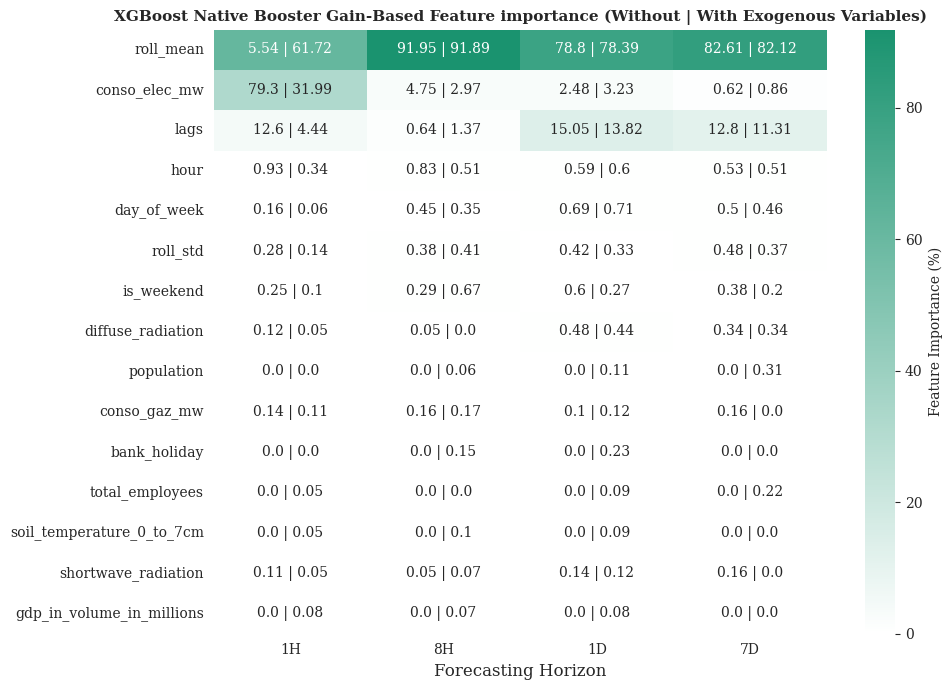

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Manually adding the right features of native importance to use for the basic dataset with the corresponding percentage number
data_without = {
    'feature': [
        'conso_elec_mw', 'lags', 'roll_mean', 'hour', 'roll_std', 'day_of_week',
        'conso_gaz_mw', 'diffuse_radiation', 'shortwave_radiation', 'insee_region',
        'week_of_year', 'quarter', 'is_weekend', 'temperature_2m', 'month'
    ],
    '1H': [79.30, 12.60, 5.54, 0.93, 0.28, 0.16, 0.14, 0.12, 0.11, 0.09, 0.06, 0.07, 0.25, 0.26, 0.03],
    '8H': [4.75, 0.64, 91.95, 0.83, 0.38, 0.45, 0.16, 0.05, 0.05, 0.07, 0.04, 0.04, 0.29, 0.05, 0.03],
    '1D': [2.48, 15.05, 78.80, 0.59, 0.42, 0.69, 0.10, 0.48, 0.14, 0.09, 0.06, 0.05, 0.60, 0.93, 0.07],
    '7D': [0.62, 12.80, 82.61, 0.53, 0.48, 0.50, 0.16, 0.34, 0.16, 0.12, 0.28, 0.11, 0.38, 0.40, 0.17]
}
df_without = pd.DataFrame(data_without)

# Manually adding the right features of native importance to use for the enriched dataset with the corresponding percentage number
data_with = {
    'feature': [
        'roll_mean', 'conso_elec_mw', 'lags', 'hour', 'day_of_week', 'roll_std',
        'is_weekend', 'conso_gaz_mw', 'diffuse_radiation', 'shortwave_radiation',
        'gdp_in_volume_in_millions', 'total_employees', 'bank_holiday',
        'soil_temperature_0_to_7cm', 'population'
    ],
    '1H': [61.72, 31.99, 4.44, 0.34, 0.06, 0.14, 0.10, 0.11, 0.05, 0.05, 0.08, 0.05, 0.0, 0.05, 0.0],
    '8H': [91.89, 2.97, 1.37, 0.51, 0.35, 0.41, 0.67, 0.17, 0.0, 0.07, 0.07, 0.0, 0.15, 0.10, 0.06],
    '1D': [78.39, 3.23, 13.82, 0.60, 0.71, 0.33, 0.27, 0.12, 0.44, 0.12, 0.08, 0.09, 0.23, 0.09, 0.11],
    '7D': [82.12, 0.86, 11.31, 0.51, 0.46, 0.37, 0.20, 0.0, 0.34, 0.0, 0.0, 0.22, 0.0, 0.0, 0.31]
}
df_with = pd.DataFrame(data_with)

#Sorting the feature importance by the mean between basic and enriched dataset and also selecting the first 19 numbers
df_with['mean_importance'] = df_with[['1H','8H','1D','7D']].mean(axis=1)
df_with = df_with.sort_values('mean_importance', ascending=False).head(19)

#Making sure to filter the same 19 features in the basic dataset
selected_features = df_with['feature'].tolist()
df_without = df_without.set_index('feature').reindex(selected_features)
df_with = df_with.set_index('feature').reindex(selected_features)

#Filling the missing values of the basic dataset that do not contain the exogenous features with 0.0
df_without = df_without.fillna(0.0)
df_with = df_with.fillna(0.0)

#Creating the labels of without | with exogenous features for better comparison
labels = (
    df_without[['1H','8H','1D','7D']].round(2).astype(str)
    + " | "
    + df_with[['1H','8H','1D','7D']].round(2).astype(str)
)

# making sure that the color bar is based on the with exogenous features scores
color_data = df_with[['1H','8H','1D','7D']]


# giving the figure the the same color as the color used in all other plots showing XGBoost
xgb_cmap = LinearSegmentedColormap.from_list("xgb_cmap", ["#ffffff", "#1A936F"])

#Creating the plot
plt.figure(figsize=(10, 7))
sns.heatmap(
    color_data,
    annot=labels,
    fmt='',
    cmap=xgb_cmap,
    cbar_kws={'label': 'Feature Importance (%)'}
)

plt.title("XGBoost Native Booster Gain-Based Feature importance (Without | With Exogenous Variables)", fontsize=11, weight='bold')
plt.xlabel("Forecasting Horizon", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.savefig("XGBoost_NativeGain_Importance.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Wilcoxon Paired Samples t-test

## XGBoost

In [53]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

#XGBoost regional mae values on the 1 hour horizon for basic dataset
XGB_1h_original = [
    151.23, 66.64, 55.30, 50.88, 97.05, 107.81,
    59.65, 51.02, 95.27, 79.75, 122.30, 78.31
]

#XGBoost regional mae values on the 1 hour horizon for enriched dataset
XGB_1h_exo = [
    151.34, 74.24, 67.58, 52.20, 97.23, 111.28,
    63.69, 57.09, 96.40, 81.98, 129.74, 80.19
]


#XGBoost regional mae values on the 8 hour horizon for basic dataset
XGB_8h_original = [
    325.17, 128.64, 107.78, 119.21, 192.49, 216.63,
    145.45, 118.02, 196.95, 171.41, 263.28, 152.56
]


#XGBoost regional mae values on the 8 hour horizon for enriched dataset
XGB_8h_exo = [
    304.24, 126.20, 116.31, 116.48, 186.20, 215.76,
    141.54, 114.17, 192.60, 165.47, 256.03, 151.09
]


#XGBoost regional mae values on the 1-day horizon for basic  dataset

XGB_24h_original = [
    449.85, 171.46, 144.10, 173.79, 265.89, 283.80,
    208.99, 170.14, 284.01, 246.20, 365.87, 208.24
]



#XGBoost regional mae values on the 1-day horizon for enriched dataset
XGB_24h_exo = [
    441.23, 168.98, 146.91, 173.53, 261.30, 277.22,
    203.48, 163.97, 282.10, 241.59, 365.16, 208.34
]


#XGBoost regional mae values on the 7-day horizon for basic dataset

XGB_7d_original = [
    1072.79, 389.36, 425.65, 450.75, 639.30, 619.81,
    501.96, 414.21, 693.03, 649.63, 884.08, 559.32
]

#XGBoost regional mae values on the 7-day horizon for enriched dataset
XGB_7d_exo = [
    922.62, 300.97, 274.00, 328.24, 492.07, 512.87,
    373.28, 297.31, 566.07, 516.00, 740.01, 424.29
]



#Creating the rank_biserial function to showcase the rank
def rank_biserial(a, b):
    #Converting the data into arrays and computing the paired differences
    d = np.array(a) - np.array(b)

    #Looking at where numbers are not zero and identifying otherwise if effect size is 0
    nonzero_idx = np.where(d != 0)[0]
    if len(nonzero_idx) == 0:
        return 0.0
    d_nz = d[nonzero_idx]

    #ranking the absolute differences based on the wilcoxon style
    abs_d = np.abs(d_nz)
    ranks = pd.Series(abs_d).rank(method='average').values

    #applying the signees back to the ranks
    signed_ranks = ranks * np.sign(d_nz)
    sum_pos = signed_ranks[signed_ranks > 0].sum()
    sum_neg = -signed_ranks[signed_ranks < 0].sum()

    #total sum rank normalization for the biserial-rank
    total = ranks.sum()
    return (sum_pos - sum_neg) / total

#Storing all horizons in a dictionary to use in the for loop

data = {
    "1h":  (XGB_1h_original,  XGB_1h_exo),
    "8h":  (XGB_8h_original,  XGB_8h_exo),
    "24h": (XGB_24h_original, XGB_24h_exo),
    "7d":  (XGB_7d_original,  XGB_7d_exo),
}


#setting the significance level to 0.05
alpha = 0.05  



#Setting up a for loop so all horizons are executed simultanously.
for horizon, (orig, exo) in data.items():
    #Running the wilcoxon signed-rank test for the paired samples
    stat, p = wilcoxon(orig, exo, zero_method="wilcox", alternative="two-sided")

    #computing the rank-biserial effect size for the paired samples
    rb = rank_biserial(orig, exo)
    reject = "Yes" if p < alpha else "No"
    print(f"Horizon: {horizon:6} | W_statistics: {stat:11.1f} | p value: {p:10.6f} | Rank-Biserial value: {rb:12.3f} | Rejection of H0: {reject}")

Horizon: 1h     | W_statistics:         0.0 | p value:   0.000488 | Rank-Biserial value:       -1.000 | Rejection of H0: Yes
Horizon: 8h     | W_statistics:        11.0 | p value:   0.026855 | Rank-Biserial value:        0.718 | Rejection of H0: Yes
Horizon: 24h    | W_statistics:         7.0 | p value:   0.009277 | Rank-Biserial value:        0.821 | Rejection of H0: Yes
Horizon: 7d     | W_statistics:         0.0 | p value:   0.000488 | Rank-Biserial value:        1.000 | Rejection of H0: Yes


## LSTM

In [57]:
#LSTM regional mae values on the 1 hour horizon for basic dataset
LSTM_1h_original = [
    204.90, 116.06, 125.78, 96.95, 167.44, 167.19,
    131.03, 110.14, 137.86, 132.12, 219.99, 149.26
]

#LSTM regional mae values on the 1 hour horizon for enriched dataset
LSTM_1h_exo = [
    230.69, 133.62, 134.61, 97.79, 157.97, 197.22,
    124.81, 106.98, 168.47, 142.72, 187.66, 168.48
]

#LSTM regional mae values on the 8 hour horizon for basic dataset
LSTM_8h_original = [
    388.34, 175.32, 164.80, 172.94, 245.14, 268.63,
    200.59, 169.84, 254.39, 234.52, 342.09, 228.15
]

#LSTM regional mae values on the 8 hour horizon for enriched dataset
LSTM_8h_exo = [
    386.51, 180.48, 155.84, 179.36, 266.14, 294.02,
    216.73, 199.94, 295.45, 232.77, 330.15, 256.92
]

#LSTM regional mae values on the 1-day horizon for basic  dataset
LSTM_24h_original = [
    618.15, 239.92, 259.77, 274.52, 411.46, 465.38,
    338.14, 288.98, 405.06, 382.75, 588.19, 357.74
]


#LSTM regional mae values on the 1-day horizon for enriched dataset
LSTM_24h_exo = [
    574.21, 316.71, 269.69, 301.53, 395.00, 420.82,
    319.85, 335.66, 412.26, 404.47, 589.90, 451.32
]

#LSTM regional mae values on the 7-day horizon for basic  dataset
LSTM_7d_original = [
    1228.61, 486.51, 540.33, 503.41, 724.02, 743.99,
    554.02, 465.49, 763.47, 847.15, 1208.48, 709.14
]

#LSTM regional mae values on the 7-day horizon for enriched dataset
LSTM_7d_exo = [
    1185.59, 387.69, 449.64, 441.15, 688.60, 699.25,
    547.62, 441.19, 740.54, 702.49, 1016.62, 591.47
]

#Creating the rank_biserial function to showcase the rank
def rank_biserial(a, b):
    #Converting the data into arrays and computing the paired differences
    d = np.array(a) - np.array(b)

    #Looking at where numbers are not zero and identifying otherwise if effect size is 0
    nonzero_idx = np.where(d != 0)[0]
    if len(nonzero_idx) == 0:
        return 0.0
    d_nz = d[nonzero_idx]

    #ranking the absolute differences based on the wilcoxon style
    abs_d = np.abs(d_nz)
    ranks = pd.Series(abs_d).rank(method='average').values

    #applying the signees back to the ranks
    signed_ranks = ranks * np.sign(d_nz)
    sum_pos = signed_ranks[signed_ranks > 0].sum()
    sum_neg = -signed_ranks[signed_ranks < 0].sum()

    #total sum rank normalization for the biserial-rank
    total = ranks.sum()
    return (sum_pos - sum_neg) / total

#Storing all horizons in a dictionary to use in the for loop

data = {
    "1h":  (LSTM_1h_original,  LSTM_1h_exo),
    "8h":  (LSTM_8h_original,  LSTM_8h_exo),
    "24h": (LSTM_24h_original, LSTM_24h_exo),
    "7d":  (LSTM_7d_original,  LSTM_7d_exo),
}

#setting the significance level to 0.05
alpha = 0.05  




#Setting up a for loop so all horizons are executed simultanously.
for horizon, (orig, exo) in data.items():
    #Running the wilcoxon signed-rank test for the paired samples
    stat, p = wilcoxon(orig, exo, zero_method="wilcox", alternative="two-sided")

    #computing the rank-biserial effect size for the paired samples
    rb = rank_biserial(orig, exo)
    reject = "Yes" if p < alpha else "No"
    print(f"Horizon: {horizon:6} | W_statistics: {stat:11.1f} | p value: {p:10.6f} | Rank-Biserial value: {rb:12.3f} | Rejection of H0: {reject}")

Horizon: 1h     | W_statistics:        22.0 | p value:   0.203613 | Rank-Biserial value:       -0.436 | Rejection of H0: No
Horizon: 8h     | W_statistics:        14.0 | p value:   0.052246 | Rank-Biserial value:       -0.641 | Rejection of H0: No
Horizon: 24h    | W_statistics:        26.0 | p value:   0.339355 | Rank-Biserial value:       -0.333 | Rejection of H0: No
Horizon: 7d     | W_statistics:         0.0 | p value:   0.000488 | Rank-Biserial value:        1.000 | Rejection of H0: Yes


## GRU

In [61]:
#GRU regional mae values on the 1 hour horizon for basic dataset
GRU_1h_original = [
    187.98, 96.89, 94.93, 80.56, 131.91, 173.15,
    97.96, 89.89, 154.34, 118.87, 152.28, 121.08
]

#GRU regional mae values on the 1 hour horizon for enriched dataset
GRU_1h_exo = [
    174.30, 223.09, 124.04, 108.33, 164.54, 163.83,
    142.88, 153.44, 165.24, 183.87, 174.35, 175.11
]

#GRU regional mae values on the 8 hour horizon for basic dataset
GRU_8h_original = [
    421.78, 174.58, 206.52, 175.22, 248.22, 279.19,
    221.10, 183.45, 263.17, 235.47, 355.98, 230.20
]

#GRU regional mae values on the 8 hour horizon for enriched dataset
GRU_8h_exo = [
    342.11, 179.57, 144.63, 175.86, 218.98, 258.75,
    188.82, 193.31, 229.12, 204.04, 356.56, 258.85
]

#GRU regional mae values on the 1-day horizon for basic dataset
GRU_24h_original = [
    594.84, 272.52, 250.74, 253.89, 361.37, 394.66,
    291.29, 275.31, 363.75, 339.66, 527.39, 306.09
]

#GRU regional mae values on the 1-day horizon for enriched dataset
GRU_24h_exo = [
    604.11, 259.13, 226.01, 256.56, 341.57, 372.49,
    298.67, 257.34, 378.43, 339.72, 545.68, 334.94
]

#GRU regional mae values on the 7-day horizon for basic dataset
GRU_7d_original = [
    1088.43, 417.06, 430.58, 438.56, 669.64, 670.65,
    493.26, 419.54, 731.71, 702.68, 879.92, 590.60
]

#GRU regional mae values on the 7-day horizon for enriched dataset
GRU_7d_exo = [
    1135.14, 370.05, 379.32, 413.61, 656.89, 625.87,
    485.96, 397.18, 673.26, 647.98, 986.31, 560.85
]

#Creating the rank_biserial function to showcase the rank
def rank_biserial(a, b):
    #Converting the data into arrays and computing the paired differences
    d = np.array(a) - np.array(b)

    #Looking at where numbers are not zero and identifying otherwise if effect size is 0
    nonzero_idx = np.where(d != 0)[0]
    if len(nonzero_idx) == 0:
        return 0.0
    d_nz = d[nonzero_idx]

    #ranking the absolute differences based on the wilcoxon style
    abs_d = np.abs(d_nz)
    ranks = pd.Series(abs_d).rank(method='average').values

    #applying the signees back to the ranks
    signed_ranks = ranks * np.sign(d_nz)
    sum_pos = signed_ranks[signed_ranks > 0].sum()
    sum_neg = -signed_ranks[signed_ranks < 0].sum()

    #total sum rank normalization for the biserial-rank
    total = ranks.sum()
    return (sum_pos - sum_neg) / total

#Storing all horizons in a dictionary to use in the for loop

data = {
    "1h":  (GRU_1h_original,  GRU_1h_exo),
    "8h":  (GRU_8h_original,  GRU_8h_exo),
    "24h": (GRU_24h_original, GRU_24h_exo),
    "7d":  (GRU_7d_original,  GRU_7d_exo),
}

alpha = 0.05  # significance level

#setting the significance level to 0.05
alpha = 0.05  




#Setting up a for loop so all horizons are executed simultanously.
for horizon, (orig, exo) in data.items():
    #Running the wilcoxon signed-rank test for the paired samples
    stat, p = wilcoxon(orig, exo, zero_method="wilcox", alternative="two-sided")

    #computing the rank-biserial effect size for the paired samples
    rb = rank_biserial(orig, exo)
    reject = "Yes" if p < alpha else "No"
    print(f"Horizon: {horizon:6} | W_statistics: {stat:11.1f} | p value: {p:10.6f} | Rank-Biserial value: {rb:12.3f} | Rejection of H0: {reject}")

Horizon: 1h     | W_statistics:         4.0 | p value:   0.003418 | Rank-Biserial value:       -0.897 | Rejection of H0: Yes
Horizon: 8h     | W_statistics:        16.0 | p value:   0.077148 | Rank-Biserial value:        0.590 | Rejection of H0: No
Horizon: 24h    | W_statistics:        36.0 | p value:   0.850098 | Rank-Biserial value:        0.077 | Rejection of H0: No
Horizon: 7d     | W_statistics:        19.0 | p value:   0.129395 | Rank-Biserial value:        0.513 | Rejection of H0: No
